In [1]:
# Look at Num OTUs, Num reads for each Marker

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#For illustrator import:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
#Functions

#Raw Read Numbers
def make_rawread(infile):
    #infile = OTU_table_taxa_all.txt
    df = pd.read_csv(infile, sep='\t')
    df.rename(columns={'DUP_ID':'OTU'}, inplace=True)
    df.drop('taxonomy', axis=1, inplace=True)
    df.drop('repseq', axis=1, inplace=True)
    df.set_index('OTU', inplace=True)
    return df
    
#metadata handling and sample order
def make_metadata(infile):
    df = pd.read_csv(infile)
    #make all column names with underscore
    columns_l = list(df)
    columns_l = [c.replace('-', '_') for c in columns_l]
    df.columns = columns_l
    #extract site name
    df['site'] = df['sample_name'].str.extract('([a-zA-Z0-9]+)')
    df_full = df[:]
    #add in some missing location data
    df_full.loc[df_full['site']=='UC5', 'dec_lat'] = 32
    df_full.loc[df_full['site']=='UC5', 'dec_long'] = '.118.17'
    df_full['dec_long'] = df_full['dec_long'].str.replace('^\.','-')
    df_full.set_index('sample_name', inplace=True)
    df= df[['Description', 'Treatment', 'sample_name']]
    df['comb'] = df['Description']+'_'+df['Treatment']+'_'+df['sample_name']
    df['site_Order']=df['sample_name'].str.replace('GOC2a', '16').str.replace('GOC2b', '17').str.replace('NTC', '0')
    df['site_Order']=df['site_Order'].str.extract('(\d+)')
    df.set_index('sample_name', inplace=True)
    df['site_Order']= df['site_Order'].astype(int)
    df.sort_values('site_Order', ascending=True, inplace=True)
    return df_full, df

#DESEQ Numbers
def make_deseq(infile):
    df = pd.read_csv(infile, sep=',')
    df.rename(columns={'Unnamed: 0':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    return df

#Rarefied Read Numbers (From R script); make compositional
def make_rarereads_comp(infile):
    df= pd.read_csv(infile, sep=',')
    df.rename(columns={'Unnamed: 0':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    df=df.T
    df['Total']=df.sum(axis=1)
    tot_reads = df['Total'].tolist()
    tot_reads = set(tot_reads)
    print('Rarefied read count:', tot_reads)
    tot_reads = df['Total'].tolist()[0]
    df = df/tot_reads *100
    df.drop('Total', axis=1, inplace=True)
    df=df.T
    return df

def make_rarereads(infile):
    df= pd.read_csv(infile, sep=',')
    df.rename(columns={'Unnamed: 0':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    return df

#Taxa table
def make_taxa(infile):
    #infile = OTU_table_taxa_all.txt
    df = pd.read_csv(infile, sep='\t')
    df.rename(columns={'DUP_ID':'OTU'}, inplace=True)
    df = df[['taxonomy', 'OTU']]
    df.set_index('OTU', inplace=True)
    df['Kingdom']=df['taxonomy'].str.split("\'").str[1]
    df['Phylum']=df['taxonomy'].str.split("\'").str[3]
    df['Class']=df['taxonomy'].str.split("\'").str[5]
    df['Order']=df['taxonomy'].str.split("\'").str[7]
    df['Family']=df['taxonomy'].str.split("\'").str[9]
    df['Genus']=df['taxonomy'].str.split("\'").str[11]
    df['Species']=df['taxonomy'].str.split("\'").str[13]
    df=df.drop('taxonomy', axis=1)
    return df

#Filtered Taxa table
def make_Ftaxa(infile):
    df = pd.read_csv(infile, sep=',')
    df.rename(columns={'OTU_ID':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    df=df[df.columns[-7:]]
    return df

#extract sequences
def make_seq(infile):
    #infile = OTU_table_taxa_all.txt
    df = pd.read_csv(infile, sep='\t')
    df.rename(columns={'DUP_ID':'OTU'}, inplace=True)
    df.set_index('OTU', inplace=True)
    df=df[['repseq']]
    return df

In [3]:
#COI M6
print('COI')
#OTU_table_taxa_all.txt location
file_loc1 = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/COI/Analysis_20190921_1416/all_lib/Post_Blast_20190925_0914/OTU_table_taxa_all.txt'
#metadata
meta_file = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/COI/Analysis_20190921_1416/GOC_20190921_1416_COI_analysis_metadata.csv'

#DESEQ data
#file2 = '/Users/kpitz/Projects/Gulf_of_California/Deseq/COI_GOC_DEseq_122117.csv'
#rarefied data
file3 = '/Users/kpitz/Projects/MBON/Rarefied_Data_unmerged/GOC_COI_OTU_Table_092619_M6.csv'
#Filtered OTU table
file4 ='/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/COI/Analysis_20190921_1416/all_lib/Filtered_OTU_taxa_table_all.csv'

raw_COI = make_rawread(file_loc1)
meta_COI, samp_lim_COI = make_metadata(meta_file)
#deseq_COI = make_deseq(file2)
rare_COI = make_rarereads(file3)
rare_comp_COI = make_rarereads_comp(file3)
taxa_COI = make_taxa(file_loc1)
Ftaxa_COI = make_Ftaxa(file4)
seq_COI = make_seq(file_loc1)

#18S_M6
print('18S')
#OTU_table_taxa_all.txt location
file_loc1 = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/18S/Analysis_20190924_1129/all_lib/Post_Blast_20190930_1343/OTU_table_taxa_all.txt'
#metadata
meta_file = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/18S/Analysis_20190924_1129/GOC_18S_Metadata.csv'
#DESEQ data
#file2 = '/Users/kpitz/Projects/Gulf_of_California/Deseq/18S_GOC_DEseq_122117.csv'
#rarefied data
file3 = '/Users/kpitz/Projects/MBON/Rarefied_Data_unmerged/GOC_18S_OTU_Table_100119_M6.csv'
#Filtered OTU table
file4 = '/Users/kpitz/Projects/Gulf_of_California/Cutadapt_Results/18S/Analysis_20190924_1129/all_lib/Filtered_OTU_taxa_table_all.csv'


raw_18S = make_rawread(file_loc1)
meta_18S, samp_lim_18S = make_metadata(meta_file)
#deseq_18S = make_deseq(file2)
rare_18S = make_rarereads(file3)
rare_comp_18S = make_rarereads_comp(file3)
taxa_18S = make_taxa(file_loc1)
Ftaxa_18S = make_Ftaxa(file4)
seq_18S = make_seq(file_loc1)


#Directory for saving Figures
plot_dir = '/Users/kpitz/Projects/Gulf_of_California/GOC_18S_COI_Combined_Cutadapt/'
plot_name = 'GOC_18SCOI_'
Plot_str = plot_dir + plot_name
print(Plot_str)

#Use to change the name of the databases
name1 = 'GOC_18SCOI_'

COI
Rarefied read count: {129363}
18S
Rarefied read count: {28676}
/Users/kpitz/Projects/Gulf_of_California/GOC_18S_COI_Combined_Cutadapt/GOC_18SCOI_


In [4]:
#Limit by Sequence Length Data
#COI
files = ['/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_COI_seq_table_092519.csv',
         '/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_COI_otu_table_092519.csv',
         '/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_COI_taxa_table_092519.csv']
#dfs = [seq_COI_filt, raw_COI_filt, Ftaxa_COI_filt]
df = pd.read_csv(files[0])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
seq_COI_filt = df.copy()

df = pd.read_csv(files[1])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
raw_COI_filt = df.copy()

df = pd.read_csv(files[2])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
Ftaxa_COI_filt = df.copy()

raw_COI_filt.head()

#import metadata
meta_file ='/Users/kpitz/Projects/Gulf_of_California/Combined_PCTD_Metadata_043019.csv'
df= pd.read_csv(meta_file)
df=df.sort_values(['order'])
df.set_index('sample_ID', inplace=True)
print(list(df))

meta_COI_PCTD = df.copy()
meta_COI_PCTD.head()


#18S
files = ['/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_18S_seq_table_100119.csv',
         '/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_18S_otu_table_100119.csv',
         '/Users/kpitz/Projects/Gulf_of_California/Decontaminated_tables/GOC_18S_taxa_table_100119.csv']
#dfs = [seq_18S_filt, raw_18S_filt, Ftaxa_18S_filt]
df = pd.read_csv(files[0])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
seq_18S_filt = df.copy()

df = pd.read_csv(files[1])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
raw_18S_filt = df.copy()

df = pd.read_csv(files[2])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('OTU', inplace=True)
Ftaxa_18S_filt = df.copy()
df.head()

['order', 'tag_sequence', 'primer_sequence_F', 'primer_sequence_R', 'library_tag_combo', 'library', 'sample_type', 'locus', 'tag_number', 'R1', 'R2', 'Treatment', 'Time_of_Day', 'Description', 'Description_3', 'site', 'SEQ', 'BOTTLE', 'DEPTH', 'CRUISE', 'PLATFORM', 'DEC_LAT', 'DEC_LONG', 'TMP', 'SAL', 'CHL_GFF', 'PRESSURE', 'NO3', 'OXY_ML', 'RDEP', 'TRANSMISS', 'SIG_T', 'FLUOR', 'DATE_TIME', 'cruise', 'SEQAvg_dg', 'AvgOfTMP', 'StDevOfTMP', 'CountOfTMP', 'AvgOfSAL1', 'StDevOfSAL', 'CountOfSAL', 'AvgOfCHLA', 'StDevOfCHLA', 'CountOfCHLA', 'AvgOfOXY_ML1', 'CountOfOXY_ML1', 'CountOfOXY_ML', 'AvgOfTRANSMISS', 'StDevOfTRANSMISS', 'CountOfTRANSMISS', 'AvgOfSIGMA_THETA', 'StDevOfSIGMA_THETA', 'CountOfSIGMA_THETA']


,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU,,,,,,,
OTU_1,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Calanidae,Calanus,s_
OTU_10,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Metridinidae,Metridia,Metridia lucens
OTU_100,Eukaryota,Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,g_,s_
OTU_100012,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Metridinidae,Metridia,Metridia lucens
OTU_100017,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Calanidae,Calanus,s_


In [233]:
#rarefied datasets
Geller_18S = pd.read_csv('/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/18S_Geller_MGmodified_9Jan19.txt', sep='	')
Geller_18S.set_index('#OTU ID', inplace=True)
Geller_18S
#original 18S before mistake fixed (OTU_67 included and taxonomy wrong- sequences also wrong)
#Geller_18So = pd.read_csv('/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/Incorrect_18S/18S_Geller.txt', sep='	')
#Geller_18So
Geller_COI = pd.read_csv('/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/COI_Geller.txt', sep='	')
Geller_COI.set_index('#OTU ID', inplace=True)
Geller_COI

#non-rarefied datasets
file= '/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/Not_rarefied/MBARI_18S_otu_table_10097_txt.txt'
Geller_18S_nr = pd.read_csv(file, sep='	')
Geller_18S_nr.set_index('#OTU ID', inplace=True)
Geller_18S_nr
file= '/Users/kpitz/Projects/Gulf_of_California/Geller_lab_data/Not_rarefied/MBARI_COI_otu_table_10095_txt.txt'
Geller_COI_nr = pd.read_csv(file, sep='	')
Geller_COI_nr.set_index('#OTU ID', inplace=True)
Geller_18S_nr.head()


,CP23_1,CP23,CP23_2,GOC2a,GOC2b,UC10,UC1,UC12,UC13,UC14,UC15,UC2,UC3_1,UC3,UC3_2,UC4,UC5,UC6,UC7,UC9
#OTU ID,,,,,,,,,,,,,,,,,,,,
OTU_6,19231,22170,14287,34957,22575,68966,6533,28481,32333,14665,34219,3970,28208,41001,39997,13079,2023,373,10606,1568
OTU_28,16679,18639,13582,1344,1294,5722,25575,26363,29378,14098,32274,21545,20676,23539,31666,16134,14833,35070,25123,24619
OTU_89,10753,11618,4602,22,0,1691,0,1196,223,1298,725,3,0,0,0,3,0,0,0,1
OTU_34,7817,9214,2665,1670,1346,306,27,2595,1881,2881,2781,1955,189,299,68,19,17,1011,36,40
OTU_168,3404,3930,1326,490,244,0,0,1,0,773,100,0,0,0,0,0,0,0,0,0


In [6]:
#Make compositional rarefied OTU table and taxa table
# Format Geller Data to get OTU table / taxa table
print(list(Ftaxa_COI))
#levels = list(Ftaxa_COI)
levels =['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = Geller_COI.copy()
df['Species'] = df['Genus'] + ' ' + df['Species']
df.fillna('no hits', inplace=True)
df['Class']=df['Class'].str.replace('Maxillopoda', 'Hexanauplia')
#df.set_index('#OTU ID', inplace=True)

df[levels]=df[levels].astype(str)
#get rid of white space
for i in levels:
    df[i]=df[i].str.strip()

cols = list(df)
for i in range(len(cols)):
    cols[i] = cols[i].replace('.','_')
df.columns = cols

Geller_COI_taxa = df[levels]

Geller_COI_otu = df[['CP23_1', 'CP23', 'CP23_2', 'GOC2a', 'GOC2b', 'UC10', 'UC1', 'UC12', 'UC13', 
                     'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']]
print(list(df))
#This is rarefied data. Create a percent rarefied data OTU table
df = Geller_COI_otu.copy()
df=df.T
cols = list(df)
df['tot']=df.sum(axis=1)
for i in cols:
    df[i]=df[i]/df['tot'] *100
df.drop('tot', axis=1, inplace=True)
df=df.T
Geller_COI_otu_comp = df.copy()
df

['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
['CP23_1', 'CP23_2', 'CP23', 'GOC2a', 'GOC2b', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'UC1', 'UC2', 'UC3_1', 'UC3_2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'Sequence', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


,CP23_1,CP23,CP23_2,GOC2a,GOC2b,UC10,UC1,UC12,UC13,UC14,UC15,UC2,UC3_1,UC3,UC3_2,UC4,UC5,UC6,UC7,UC9
#OTU ID,,,,,,,,,,,,,,,,,,,,
OTU_1,0.212719,0.245167,0.060691,9.074794,7.174748,0.189884,0.000000,1.415120,1.799095,1.382671,4.411208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000601,0.000000
OTU_10,1.819526,1.790682,1.089432,0.116575,0.146620,2.282219,0.000000,6.706046,8.487715,5.893629,14.037027,0.000000,0.000000,0.000000,0.015623,0.001803,0.000000,0.016224,0.000000,0.243965
OTU_100,0.183275,0.233750,0.144817,0.036655,0.000000,0.182674,0.000000,0.007812,0.198297,0.003005,0.044467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1000,0.000000,0.000000,0.000000,0.004807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1001,0.000000,0.000000,0.000000,0.000000,0.002404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1003,0.000000,0.000000,0.000000,0.096144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1004,0.000000,0.000000,0.000000,0.009014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTU_1005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
#Make compositional rarefied OTU table and taxa table
#18S
# Format Geller Data to get OTU table / taxa table
print(list(Ftaxa_18S))
#levels = list(Ftaxa_18S)
levels =['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
df = Geller_18S.copy()
df['Species'] = df['Genus'] + ' ' + df['Species']
df.fillna('no hits', inplace=True)
df['Class']=df['Class'].str.replace('Maxillopoda', 'Hexanauplia')
#df.set_index('#OTU ID', inplace=True)

df[levels]=df[levels].astype(str)
#get rid of white space
for i in levels:
    df[i]=df[i].str.strip()

cols = list(df)
for i in range(len(cols)):
    cols[i] = cols[i].replace('.','_')
df.columns = cols

Geller_18S_taxa = df[levels]

Geller_18S_otu = df[['CP23_1', 'CP23', 'CP23_2', 'GOC2a',  'UC10', 'UC1', 'UC12', 'UC13', 
                     'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']]
print(list(df))
#This is rarefied data. Create a percent rarefied data OTU table
df = Geller_18S_otu.copy()
df=df.T
cols = list(df)
df['tot']=df.sum(axis=1)
for i in cols:
    df[i]=df[i]/df['tot'] *100
df.drop('tot', axis=1, inplace=True)
df=df.T
Geller_18S_otu_comp = df.copy()
df

['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
['CP23_1', 'CP23', 'CP23_2', 'GOC2a', 'UC10', 'UC1', 'UC12', 'UC13', 'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'Sequence', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'OrganismDescriptionFromGenBank']


,CP23_1,CP23,CP23_2,GOC2a,UC10,UC1,UC12,UC13,UC14,UC15,UC2,UC3_1,UC3,UC3_2,UC4,UC5,UC6,UC7,UC9
#OTU ID,,,,,,,,,,,,,,,,,,,
OTU_1,0.001173,0.001173,0.000000,0.000000,0.068012,0.075048,0.000000,0.000000,0.001173,0.000000,0.024625,0.015244,0.025798,0.008208,0.025798,0.900573,0.005863,0.304882,0.001173
OTU_10,0.024625,0.026970,0.041042,0.001173,0.000000,0.000000,0.260322,0.004690,0.000000,0.007036,0.003518,0.792692,0.722335,3.153180,0.024625,0.021107,0.724680,0.725853,0.000000
OTU_100,0.001173,0.000000,0.000000,0.002345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002345,0.002345,0.002345,0.290810,0.000000,0.004690,0.001173,0.000000
OTU_101,0.000000,0.000000,0.000000,0.000000,0.000000,0.003518,0.000000,0.000000,0.000000,0.000000,0.001173,0.002345,0.005863,0.001173,0.000000,0.056286,0.000000,0.022280,0.000000
OTU_102,0.000000,0.001173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003518,0.000000,0.015244,0.018762,0.005863,0.043387,0.017589,0.003518,0.004690,0.000000
OTU_103,5.182988,6.199651,3.483859,0.376412,0.003518,0.000000,0.341233,0.016417,0.300191,3.218846,0.000000,0.002345,0.002345,0.000000,0.001173,0.000000,0.000000,0.000000,0.001173
OTU_104,0.000000,0.000000,0.000000,0.000000,0.001173,0.003518,0.000000,0.000000,0.000000,0.000000,0.002345,0.000000,0.003518,0.002345,0.000000,0.063322,0.000000,0.016417,0.000000
OTU_105,0.000000,0.000000,0.000000,0.001173,0.472567,0.000000,0.016417,0.007036,0.029316,0.003518,0.000000,0.003518,0.004690,0.002345,0.000000,0.090292,0.011726,0.303709,0.000000
OTU_106,0.001173,0.000000,0.001173,0.000000,0.000000,0.144232,0.004690,0.000000,0.000000,0.002345,0.220453,0.140715,0.168858,0.110226,0.007036,0.093810,0.012899,0.077393,0.014071


In [8]:
meta_dat = meta_COI.reset_index()
print(list(meta_dat))
#meta_dat['site']= meta_dat.sample_name.str.split('.').str[:-1].str.join('.')
meta_dat['site_Order']=meta_dat['site'].str.replace('GOC2a', '16').str.replace('GOC2b', '17').str.replace('NTC', '0')
meta_dat['site_Order']=meta_dat['site_Order'].str.extract('(\d+)')
meta_dat['site_Order']=meta_dat['site_Order'].astype(int)
meta_dat= meta_dat.loc[meta_dat['sample_type']=='environmental']
meta_dat.sort_values(['site_Order', 'sample_name'], inplace=True)
meta_dat['sample_name']=meta_dat['sample_name'].str.replace('_COI','')
meta_dat['sample_name']=meta_dat['sample_name'].str.replace('.','_')
meta_dat.set_index('sample_name', inplace=True)

meta_dat.head()

['sample_name', 'order', 'tag_sequence', 'tag_sequence_orig', 'primer_sequence_F', 'primer_sequence_R', 'library_tag_combo', 'library', 'sample_type', 'locus', 'tag_number', 'R1', 'R2', 'Treatment', 'depth', 'dec_lat', 'dec_long', 'fluor', 'tmp', 'sal', 'sigma_theta', 'conduct', 'oxy_ml', 'transmiss', 'Description', 'site']


,order,tag_sequence,tag_sequence_orig,primer_sequence_F,primer_sequence_R,library_tag_combo,library,sample_type,locus,tag_number,...,fluor,tmp,sal,sigma_theta,conduct,oxy_ml,transmiss,Description,site,site_Order
sample_name,,,,,,,,,,,,,,,,,,,,,
UC1,1,TTCTAGCT_AA,TTCTAGCT,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N7_TTCTAGCT,N7,environmental,COI,1,...,0.317525,12.57277917,33.31300833,25.17000417,3.879983208,5.731966667,86.42458333,PCNorth,UC1,1
UC2,2,CCTAGAGT_AA,CCTAGAGT,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N8_CCTAGAGT,N8,environmental,COI,2,...,0.327413043,12.72407391,33.28353913,25.11782174,3.890925304,5.685595652,85.7651913,PCNorth,UC2,2
UC3_1,19,GCGTAAGA_AT,GCGTAAGA,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N9_GCGTAAGA,N9,environmental,COI,19,...,0.351265217,12.57266522,33.42426522,25.25619565,3.891625217,5.249904348,85.76833913,PCNorth,UC3,3
UC3_2,17,TTCTAGCT_AT,TTCTAGCT,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N10_TTCTAGCT,N10,environmental,COI,17,...,0.351265217,12.57266522,33.42426522,25.25619565,3.891625217,5.249904348,85.76833913,PCNorth,UC3,3
UC3,3,GCGTAAGA_AA,GCGTAAGA,GGWACWGGWTGAACWGTWTAYCCYCC,TANACYTCNGGRTGNCCRAARAAYCA,N11_GCGTAAGA,N11,environmental,COI,3,...,0.351265217,12.57266522,33.42426522,25.25619565,3.891625217,5.249904348,85.76833913,PCNorth,UC3,3


# With Filtered Data
# Number of OTUs

## Banzai Pipelline

In [12]:
#18S
print('Banzai 18S')
df=raw_18S_filt.copy()
print('Number of OTUs:',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df.head()

Banzai 18S
Number of OTUs: 44837
Samples: ['UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'GOC2a', 'GOC2b', 'CP23', 'UC3_2', 'CP23_2', 'UC3_1', 'CP23_1', 'NTC_1']


,UC1,UC2,UC3,UC4,UC5,UC6,UC7,UC9,UC10,UC12,...,UC15,GOC2a,GOC2b,CP23,UC3_2,CP23_2,UC3_1,CP23_1,NTC_1,tot
OTU,,,,,,,,,,,,,,,,,,,,,
OTU_1,70553,62933,54906,37359,30067,71697,43061,58530,3400,9650,...,7227,0,0,738,63979,1396,33349,542,0,549722
OTU_2,0,6,2,2,2,0,6,1,1081,12345,...,17139,23332,15726,3839,0,2509,1,2901,0,95776
OTU_6,770,414,8144,3177,573,126,2058,774,18817,4312,...,3492,2058,702,8236,6592,5264,4630,6360,0,84972
OTU_9,6,7,198,13804,1907,3705,304,0,22407,531,...,1518,544,1241,3382,36,1744,139,2392,0,83877
OTU_3,1,9,12,7,2,477,21,172,2265,11351,...,14838,221,241,8802,34,6258,7,6813,0,71594


In [13]:
#COI
print('Banzai COI')
df=raw_COI_filt.copy()
print('Number of OTUs:',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df.head()

Banzai COI
Number of OTUs: 21402
Samples: ['UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'GOC2a', 'GOC2b', 'CP23', 'UC3_2', 'CP23_2', 'UC3_1', 'CP23_1', 'NTC_2']


,UC1,UC2,UC3,UC4,UC5,UC6,UC7,UC9,UC10,UC12,...,UC15,GOC2a,GOC2b,CP23,UC3_2,CP23_2,UC3_1,CP23_1,NTC_2,tot
OTU,,,,,,,,,,,,,,,,,,,,,
OTU_2,92204,47636,67407,38939,22886,102183,47323,76191,3751,5742,...,7291,40,22,131,59343,181,27718,87,0,599493
OTU_1,16133,27319,56573,25109,2636,34685,19599,31821,2832,9248,...,1509,13,10,5,27582,8,24681,3,0,279807
OTU_3,46954,6398,22018,800,9624,52,3704,0,21,3,...,2,0,0,0,10976,0,7704,0,0,108262
OTU_7,0,0,0,8,0,0,0,8,0,3,...,0,0,0,42221,0,8134,1,47359,0,97818
OTU_5,4731,33243,15782,7383,12114,4742,7598,365,466,195,...,152,58,67,0,1642,0,5708,2,0,94550


## USEARCH Pipeline

In [16]:
#18S Geller
print('USEARCH 18S:')
df=Geller_18S_nr.copy()
print('Number of OTUs:',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df.head()

USEARCH 18S:
Number of OTUs: 342
Samples: ['CP23_1', 'CP23', 'CP23_2', 'GOC2a', 'GOC2b', 'UC10', 'UC1', 'UC12', 'UC13', 'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']


,CP23_1,CP23,CP23_2,GOC2a,GOC2b,UC10,UC1,UC12,UC13,UC14,...,UC2,UC3_1,UC3,UC3_2,UC4,UC5,UC6,UC7,UC9,tot
#OTU ID,,,,,,,,,,,,,,,,,,,,,
OTU_203,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
OTU_313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
OTU_294,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,12
OTU_205,0,0,0,0,0,0,1,0,0,0,...,1,0,3,6,0,0,0,0,1,13
OTU_292,0,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,10,13


In [17]:
#COI Geller
print('USEARCH COI:')
df=Geller_COI_nr.copy()
print('Number of OTUs:',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df.head()

USEARCH COI:
Number of OTUs: 1596
Samples: ['CP23_1', 'CP23_2', 'CP23', 'GOC2a', 'GOC2b', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'UC1', 'UC2', 'UC3_1', 'UC3_2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']


,CP23_1,CP23_2,CP23,GOC2a,GOC2b,UC10,UC12,UC13,UC14,UC15,...,UC2,UC3_1,UC3_2,UC3,UC4,UC5,UC6,UC7,UC9,tot
#OTU ID,,,,,,,,,,,,,,,,,,,,,
OTU_1465,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,0,4
OTU_1512,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,4
OTU_1506,0,0,0,0,0,2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,5
OTU_1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,5
OTU_1119,0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


# Percent Annotated to at least Phylum level

In [219]:
#Geller 18S
df = Geller_18S_taxa.copy()
total = len(df.index)
print(len(df.index))


df=df.replace('no hits',0)
df= df.astype(bool).astype(int)

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df=df.loc[df['tot']==0]

print(len(df.index))          
unannot = len(df.index)
print('Percent Phylum unannotated:',unannot/total *100)

df.head()

341
100
Percent Phylum unannotated: 29.32551319648094


,Phylum,Class,Order,Family,Genus,Species,tot
#OTU ID,,,,,,,
OTU_107,0,0,0,0,0,0,0
OTU_108,0,0,0,0,0,0,0
OTU_13,0,0,0,0,0,0,0
OTU_97,0,0,0,0,0,0,0
OTU_106,0,0,0,0,0,0,0


In [218]:
#Geller COI
df = Geller_COI_taxa.copy()
total = len(df.index)
print(len(df.index))


df=df.replace('no hits',0)
df= df.astype(bool).astype(int)

df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df=df.loc[df['tot']==0]

print(len(df.index))          
unannot = len(df.index)
print('Percent Phylum unannotated:',unannot/total *100)

df.head()

1596
1317
Percent Phylum unannotated: 82.5187969924812


,Phylum,Class,Order,Family,Genus,Species,tot
#OTU ID,,,,,,,
OTU_493,0,0,0,0,0,0,0
OTU_492,0,0,0,0,0,0,0
OTU_921,0,0,0,0,0,0,0
OTU_532,0,0,0,0,0,0,0
OTU_491,0,0,0,0,0,0,0


In [232]:
#Banzai 18S
df= pd.concat([Ftaxa_18S_filt, raw_18S_filt], axis=1)
total = len(df.index)
print(len(df.index))
df=df.loc[df['Phylum'].isin(['not assigned', 'p_', np.nan])]

print(len(df.index))          
unannot = len(df.index)
print('Percent Phylum unannotated:',unannot/total *100)

df.head()
df


44837
2364
Percent Phylum unannotated: 5.272431250975757


,Kingdom,Phylum,Class,Order,Family,Genus,Species,UC1,UC2,UC3,...,UC14,UC15,GOC2a,GOC2b,CP23,UC3_2,CP23_2,UC3_1,CP23_1,NTC_1
OTU,,,,,,,,,,,,,,,,,,,,,
OTU_100338,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_100392,Eukaryota,p_,c_,o_,f_,g_,s_,0,2,0,...,0,0,0,0,0,0,0,0,0,0
OTU_100394,Eukaryota,p_,c_,o_,f_,g_,s_,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_100746,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,0,0,0,...,0,0,0,0,2,0,0,0,0,0
OTU_101045,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,0,0,0,...,0,0,0,0,0,0,0,0,2,0
OTU_101091,Eukaryota,p_,c_,o_,f_,g_,s_,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_101110,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,0,0,0,...,0,0,0,0,0,0,0,0,2,0
OTU_101113,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,2,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_101390,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,not assigned,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
#Banzai COI
df= pd.concat([Ftaxa_COI_filt, raw_COI_filt], axis=1)
total = len(df.index)
print(len(df.index))
df=df.loc[df['Phylum'].isin(['not assigned', 'p_', np.nan])]

print(len(df.index))          
unannot = len(df.index)
print('Percent Phylum unannotated:',unannot/total *100)

df

21402
3580
Percent Phylum unannotated: 16.72740865339688


,Kingdom,Phylum,Class,Order,Family,Genus,Species,UC1,UC2,UC3,...,UC14,UC15,GOC2a,GOC2b,CP23,UC3_2,CP23_2,UC3_1,CP23_1,NTC_2
OTU,,,,,,,,,,,,,,,,,,,,,
OTU_100062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,2,0,0,0,2,0
OTU_100086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_1003,Eukaryota,p_,c_,o_,f_,g_,s_,0,0,211,...,0,0,0,0,0,0,0,207,0,0
OTU_100301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_100814,Eukaryota,p_,c_,o_,f_,g_,s_,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_100862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_10089,not assigned,not assigned,not assigned,not assigned,not assigned,g_,s_,0,0,0,...,37,12,4,0,0,0,0,0,0,0
OTU_101270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,4,0,0,0,0
OTU_101273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,4,0,0,0,0


# Number of Families Annotated Across Pipelines

## USEARCH Pipeline

In [21]:
#Number of Families
df = Geller_18S_taxa.copy()
df= df.loc[df['Class']!='Insecta']
df= df.loc[df['Genus']!='Homo']
df= df.loc[df['Class']!='Arachnida']
df= df.loc[df['Family']!='Suidae']
df['count']=1
df=df.loc[df['Family']!='no hits']
df=df.groupby('Family').sum()
print('Number of Families:', len(df.index))
df.head()

Number of Families: 69


,count
Family,
Acartiidae,3
Aeginidae,1
Alciopidae,1
Anadoridoidea,1
Andvakiidae,1


In [20]:
#Number of Families
df = Geller_COI_taxa.copy()
df= df.loc[df['Class']!='Insecta']
df= df.loc[df['Genus']!='Homo']
df= df.loc[df['Class']!='Arachnida']
df= df.loc[df['Family']!='Suidae']
df['count']=1
df=df.loc[df['Family']!='no hits']
df=df.groupby('Family').sum()
print('Number of Families:', len(df.index))
df.head()

Number of Families: 100


,count
Family,
Abylidae,2
Acartiidae,3
Actinostolidae,1
Aequoreidae,1
Aetideidae,2


## Banzai Pipeline

In [18]:
#Number of Families
df = Ftaxa_COI_filt.copy()
df['count']=1
df=df.loc[df['Family'].isin(['f_', 'not assigned','unknown'])==False]
df=df.groupby('Family').sum()
print('Number of Families:', len(df.index))
df.head()

Number of Families: 314


,count
Family,
Abylidae,11
Acartiidae,65
Acinetosporaceae,1
Actiniidae,2
Actinostolidae,1


In [19]:
#Number of Families
df = Ftaxa_18S_filt.copy()
df['count']=1
df=df.loc[df['Family'].isin(['f_', 'not assigned','unknown'])==False]
df=df.groupby('Family').sum()
print('Number of Families:', len(df.index))
df.head()

Number of Families: 177


,count
Family,
Acartiidae,65
Actiniidae,4
Aeginidae,15
Aetideidae,1
Agalmatidae,181


# Taxonomic Resolution

## Banzai Pipeline

In [44]:
#look at Number of species by Phylum make dinoflagellate Class be labeled as it's own phylum
df= pd.concat([Ftaxa_18S, raw_18S_filt], axis=1)
cols = list(raw_18S_filt)
df['tot']=df[cols].sum(axis=1)
df=df.drop(cols, axis=1)
df.loc[df['Class']=='Dinophyceae', 'Phylum']='Dinophyceae'
df = df.loc[df['Species'].isin(['not assigned','s_'])==False]
df=df.groupby(['Phylum', 'Family','Species']).sum()
df['Num_species']=1
df=df.groupby(['Phylum']).sum()
df=df.sort_values('Num_species', ascending=False)
df.head()

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,tot,Num_species
Phylum,,
Arthropoda,79974.0,43
Mollusca,3416.0,14
Dinophyceae,5779.0,13
Cnidaria,4803.0,12
Chordata,17947.0,10


In [49]:
#look at Number of species by Phylum make dinoflagellate Class be labeled as it's own phylum
df= pd.concat([Ftaxa_COI, raw_COI_filt], axis=1)
cols = list(raw_COI_filt)
df['tot']=df[cols].sum(axis=1)
df=df.drop(cols, axis=1)
df.loc[df['Class']=='Dinophyceae', 'Phylum']='Dinophyceae'
df = df.loc[df['Species'].isin(['not assigned','s_'])==False]
df=df.groupby(['Phylum', 'Family','Species']).sum()
df['Num_species']=1
df=df.groupby(['Phylum']).sum()
df=df.sort_values('Num_species', ascending=False)
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,tot,Num_species
Phylum,,
Arthropoda,1975205.0,133
Mollusca,34668.0,26
Chordata,31756.0,24
Cnidaria,247407.0,18
Echinodermata,1892.0,15
Dinophyceae,5869.0,7
Bacillariophyta,152.0,6
Annelida,4630.0,5
Chlorophyta,1142.0,5


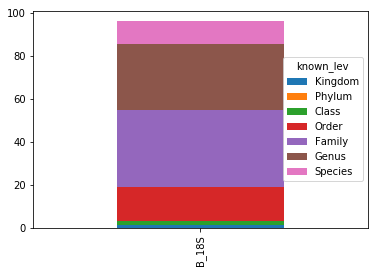

known_lev,Kingdom,Phylum,Class,Order,Family,Genus,Species
B_18S,1.536677,0.07583,1.534447,15.721391,36.046123,30.443607,10.908402


In [98]:
# Label OTU by lowest level annotated
df= Ftaxa_18S_filt.copy()
levels =list(Ftaxa_18S_filt)
#df=df.loc[df['Phylum']!='not assigned']
df.loc[df['Class']=='Dinophyceae', 'Phylum']='Dinophyceae'
unknowns =['k_','p_', 'c_', 'o_', 'f_', 'g_', 's_']
unknowns = unknowns[::-1]
levels_o =levels[::-1]
df['unknown_lev']=''
for i in range(len(unknowns)):
    df.loc[df[levels_o[i]]==unknowns[i],'unknown_lev']=unknowns[i]
#Now want column with lowest known level:
df['known_lev']=''
levels_o.append('Kingdom_unassigned')

for x in range(len(unknowns)):
    df.loc[df['unknown_lev']==unknowns[x],'known_lev']=levels_o[x+1]

df.loc[df['Phylum']=='not assigned','known_lev']='not assigned'
df.loc[df['known_lev']=='','known_lev']='Species'

df['B_18S']=1

df=df.groupby(['known_lev']).sum()
df=df.T
cols=list(df)
df['tot']=df.sum(axis=1)
for i in df:
    df[i]=df[i]/df['tot']*100
df.drop('tot', axis=1, inplace=True)
df=df[levels]
df.plot(kind='bar', stacked=True)
plt.show()
df_B18S = df.copy()
df


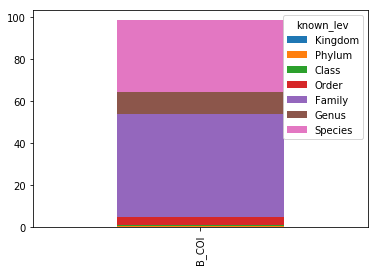

known_lev,Kingdom,Phylum,Class,Order,Family,Genus,Species
B_COI,0.289693,0.350435,0.518643,3.822073,48.729091,10.746659,33.865994


In [99]:
# Label OTU by lowest level annotated
df= Ftaxa_COI_filt.copy()
levels =list(Ftaxa_COI_filt)
#df=df.loc[df['Phylum']!='not assigned']
df.loc[df['Class']=='Dinophyceae', 'Phylum']='Dinophyceae'
unknowns =['k_','p_', 'c_', 'o_', 'f_', 'g_', 's_']
unknowns = unknowns[::-1]
levels_o =levels[::-1]
df['unknown_lev']=''
for i in range(len(unknowns)):
    df.loc[df[levels_o[i]]==unknowns[i],'unknown_lev']=unknowns[i]
#Now want column with lowest known level:
df['known_lev']=''
levels_o.append('Kingdom_unassigned')

for x in range(len(unknowns)):
    df.loc[df['unknown_lev']==unknowns[x],'known_lev']=levels_o[x+1]

df.loc[df['Phylum']=='not assigned','known_lev']='not assigned'
df.loc[df['known_lev']=='','known_lev']='Species'

df['B_COI']=1

df=df.groupby(['known_lev']).sum()
df=df.T
cols=list(df)
df['tot']=df.sum(axis=1)
for i in df:
    df[i]=df[i]/df['tot']*100
df.drop('tot', axis=1, inplace=True)
df=df[levels]
df.plot(kind='bar', stacked=True)
plt.show()
df_BCOI = df.copy()
df


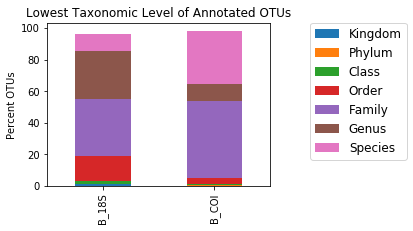

known_lev,Kingdom,Phylum,Class,Order,Family,Genus,Species
B_18S,1.536677,0.075830,1.534447,15.721391,36.046123,30.443607,10.908402
B_COI,0.289693,0.350435,0.518643,3.822073,48.729091,10.746659,33.865994


In [106]:
df= pd.concat([df_B18S, df_BCOI], axis=0)
df.plot(kind='bar', stacked=True, figsize=[4,3])
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='12')
plt.title('Lowest Taxonomic Level of Annotated OTUs')
plt.ylabel('Percent OTUs')
plt.show()
df

## Euphausia

In [108]:
df= pd.concat([Ftaxa_18S_filt, raw_18S_filt], axis=1)
df=df.loc[df['Family']=='Euphausiidae']
df=df.groupby(levels).sum()
df

UC1  \
Kingdom   Phylum     Class        Order        Family       Genus       Species                      
Eukaryota Arthropoda Malacostraca Euphausiacea Euphausiidae Euphausia   Euphausia brevis         0   
                                                                        s_                   14975   
                                                            Nyctiphanes Nyctiphanes simplex      0   
                                                                        s_                       0   
                                                            Thysanoessa s_                       4   
                                                            g_          s_                    4466   

                                                                                              UC2  \
Kingdom   Phylum     Class        Order        Family       Genus       Species                     
Eukaryota Arthropoda Malacostraca Euphausiacea Euphausiidae Euphausia   Euphausia brevis        0   
                                                                        s_                   2828   
                                                            Nyctiphanes Nyctiphanes simplex     0   
                                                                        s_                      0   
                                                            Thysanoessa s_                     52   
                                                            g_          s_                   1766   

                                                                                              UC3  \
Kingdom   Phylum     Class        Order        Family       Genus       Species                     
Eukaryota Arthropoda Malacostraca Euphausiacea Euphausiidae Euphausia   Euphausia brevis        0   
                                                                        s_                   1216   
                                                            Nyctiphanes Nyctiphanes simplex     0   
                                                                        s_                      0   
                                                            Thysanoessa s_                     49   
                                                            g_          s_                   1162   

                                                                                             UC4  \
Kingdom   Phylum     Class        Order        Family       Genus       Species                    
Eukaryota Arthropoda Malacostraca Euphausiacea Euphausiidae Euphausia   Euphausia brevis       0   
                                                                        s_                    69   
                                                            Nyctiphanes Nyctiphanes simplex    0   
                                                                        s_                     0   
                                                            Thysanoessa s_                   415   
                                                            g_          s_                   849   

                                                                                               UC5  \
Kingdom   Phylum     Class        Order        Family       Genus       Species                      
Eukaryota Arthropoda Malacostraca Euphausiacea Euphausiidae Euphausia   Euphausia brevis         0   
                                                                        s_                    1616   
                                                            Nyctiphanes Nyctiphanes simplex      0   
                                                                        s_                       0   
                                                            Thysanoessa s_                    2020   
                                                            g_          s_                   37594   

                                          

# Percent C. pacificus

In [114]:
#percent rarefied reads
df= pd.concat([Ftaxa_18S_filt, rare_comp_18S], axis=1)
df=df.loc[df['Genus']=='Calanus']
df=df.groupby(levels).sum()
df=df.T
df=pd.concat([df, meta_dat['site_Order']], axis=1)
df=df.sort_values('site_Order')
df


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calanidae, Calanus, Calanus glacialis)","(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calanidae, Calanus, Calanus hyperboreus)","(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calanidae, Calanus, s_)",site_Order
UC1,0.000000,0.000000,63.167806,1
UC2,0.000000,0.000000,69.985354,2
UC3_2,0.000000,0.000000,60.507044,3
UC3_1,0.000000,0.000000,50.401032,3
UC3,0.000000,0.000000,49.333938,3
UC4,0.000000,0.000000,52.566606,4
UC5,0.000000,0.000000,31.698982,5
UC6,0.000000,0.000000,69.075185,6
UC7,0.000000,0.000000,48.866648,7
UC9,0.000000,0.000000,58.725066,9


In [115]:
#percent rarefied reads
df= pd.concat([Ftaxa_COI_filt, rare_comp_COI], axis=1)
df=df.loc[df['Genus']=='Calanus']
df=df.groupby(levels).sum()
df=df.T
df=pd.concat([df, meta_dat['site_Order']], axis=1)
df=df.sort_values('site_Order')
df


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,"(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calanidae, Calanus, Calanus pacificus)","(Eukaryota, Arthropoda, Hexanauplia, Calanoida, Calanidae, Calanus, s_)",site_Order
UC1,53.755711,0.000773,1
UC2,46.152300,0.003865,2
UC3_2,58.378362,0.001546,3
UC3_1,38.745236,0.000000,3
UC3,35.663984,0.000000,3
UC4,36.664270,0.003092,4
UC5,12.839838,0.001546,5
UC6,64.645223,0.000000,6
UC7,40.283543,0.000000,7
UC9,54.640817,0.005411,9


# Look for Copepod genera detected by Calcofi

In [139]:
cal_genera = ['Aetideus','Calanus','Candacia','Eucalanus','Euchaeta',
              'Euchirella','Gaidius','Gaetanus', 'Gaussia','Heterorhabdus','Labidocera',
             'Lucicutia','Mesocalanus','Metridia','Nannocalanus','Neocalanus',
             'Pareucalanus','Pleuromamma','Rhincalanus','Scolecithrix','Subeucalanus']
print(len(cal_genera))

21


In [140]:
df= pd.concat([Ftaxa_COI, raw_COI], axis=1)
df=df.loc[df['Genus'].isin(cal_genera)]
df=df.sort_values('Genus')
print(df['Genus'].unique())
df=df.groupby(levels[:6]).sum()
df['tot']=df.sum(axis=1)
df

['Calanus' 'Candacia' 'Eucalanus' 'Euchaeta' 'Euchirella' 'Gaetanus'
 'Labidocera' 'Lucicutia' 'Mesocalanus' 'Metridia' 'Neocalanus'
 'Pareucalanus' 'Pleuromamma' 'Rhincalanus' 'Scolecithrix' 'Subeucalanus']


UC1_COI  \
Phylum     Class       Order     Family           Genus        Species                              
Arthropoda Hexanauplia Calanoida Aetideidae       Euchirella   Euchirella pulchra            1119   
                                                               Euchirella rostrata            387   
                                                               s_                              47   
                                                  Gaetanus     Gaetanus minor                   0   
                                 Calanidae        Calanus      Calanus pacificus           115831   
                                                               s_                               7   
                                                  Mesocalanus  Mesocalanus tenuicornis          0   
                                                  Neocalanus   Neocalanus gracilis              0   
                                                               s_                               0   
                                 Candaciidae      Candacia     Candacia bipinnata               4   
                                                               Candacia curta                   0   
                                                               Candacia ethiopica               0   
                                                               Candacia simplex                 0   
                                                               Candacia truncata                0   
                                                               s_                               0   
                                 Eucalanidae      Eucalanus    Eucalanus californicus           1   
                                                               Eucalanus inermis                0   
                                                               Eucalanus pseudattenuatus        0   
                                                               Eucalanus subtenuis              0   
                                                               s_                               0   
                                                  Pareucalanus Pareucalanus sewelli             0   
                                                               s_                               0   
                                                  Rhincalanus  Rhincalanus nasutus            197   
                                                               s_                               1   
                                                  Subeucalanus Subeucalanus monachus            0   
                                                               Subeucalanus pileatus            0   
                                                               Subeucalanus subcrassus          0   
                                                               Subeucalanus subtenuis           0   
                                                               s_                               0   
                                 Euchaetidae      Euchaeta     Euchaeta acuta                   0   
                                                               Euchaeta indica                  0   
                                                               Euchaeta longicornis             0   
                                                               Euchaeta marina                  1   
                                                               Euchaeta media                   0   
                                                               s_                               0   
                                 Lucicutiidae     Lucicutia    Lucicutia flavicornis            5   
                                                               s_                               0   
                                 Metridinidae     Metridia     Metridia lucens                657   
                                                  

In [141]:

df= pd.concat([Ftaxa_18S, raw_18S], axis=1)
df=df.loc[df['Genus'].isin(cal_genera)]
df=df.sort_values('Genus')
print(df['Genus'].unique())
df=df.groupby(levels[:6]).sum()
df['tot']=df.sum(axis=1)
df

['Calanus' 'Candacia' 'Labidocera' 'Lucicutia' 'Metridia' 'Neocalanus'
 'Pareucalanus' 'Pleuromamma' 'Scolecithrix' 'Subeucalanus']


UC1_18S  \
Phylum     Class       Order     Family           Genus        Species                            
Arthropoda Hexanauplia Calanoida Calanidae        Calanus      Calanus glacialis              0   
                                                               Calanus hyperboreus            0   
                                                               s_                         72733   
                                                  Neocalanus   s_                             0   
                                 Candaciidae      Candacia     Candacia bipinnata             0   
                                                               Candacia pachydactyla          0   
                                                               Candacia truncata              0   
                                                               s_                             0   
                                 Eucalanidae      Pareucalanus s_                             0   
                                                  Subeucalanus Subeucalanus subcrassus        0   
                                                               s_                             0   
                                 Lucicutiidae     Lucicutia    Lucicutia flavicornis          0   
                                 Metridinidae     Metridia     Metridia lucens             6483   
                                                               s_                            20   
                                                  Pleuromamma  Pleuromamma abdominalis        0   
                                                               Pleuromamma xiphias            4   
                                                               s_                          1743   
                                 Pontellidae      Labidocera   Labidocera acuta               0   
                                                               s_                             0   
                                 Scolecitrichidae Scolecithrix Scolecithrix danae             0   
                                                               s_                             0   

                                                                                        UC2_18S  \
Phylum     Class       Order     Family           Genus        Species                            
Arthropoda Hexanauplia Calanoida Calanidae        Calanus      Calanus glacialis              0   
                                                               Calanus hyperboreus            0   
                                                               s_                         64503   
                                                  Neocalanus   s_                             0   
                                 Candaciidae      Candacia     Candacia bipinnata             0   
                                                               Candacia pachydactyla          0   
                                                               Candacia truncata              0   
                                                               s_                             4   
                                 Eucalanidae      Pareucalanus s_                             0   
                                                  Subeucalanus Subeucalanus subcrassus        0   
                                                               s_                             7   
                                 Lucicutiidae     Lucicutia    Lucicutia flavicornis         10   
                                 Metridinidae     Metridia     Metridia lucens             5800   
                                                               s_                            16   
                                                  Pleuromamma  Pleuromamma abdominalis        0   
                                                               Pleuromamma xiphias            0   
                            

In [142]:
df= pd.concat([Geller_18S_nr, Geller_18S_taxa], axis=1)
levels= list(Geller_18S_taxa)
df=df.loc[df['Genus'].isin(cal_genera)]
df=df.sort_values('Genus')
print(df['Genus'].unique())
df=df.groupby(levels[:5]).sum()
df['tot']=df.sum(axis=1)
df

['Calanus' 'Candacia' 'Euchaeta' 'Labidocera' 'Lucicutia' 'Mesocalanus'
 'Metridia' 'Pareucalanus' 'Rhincalanus' 'Scolecithrix' 'Subeucalanus']


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


CP23_1   CP23  \
Phylum     Class       Order     Family           Genus                         
Arthropoda Hexanauplia Calanoida Calanidae        Calanus          647    875   
                                                  Mesocalanus       36     51   
                                 Candaciidae      Candacia          10     10   
                                 Eucalanidae      Pareucalanus    8177  11517   
                                                  Rhincalanus    19235  22175   
                                                  Subeucalanus   15289  15330   
                                 Euchaetidae      Euchaeta         917   1273   
                                 Lucicutiidae     Lucicutia          6      6   
                                 Metridinidae     Metridia           0      0   
                                 Pontellidae      Labidocera        55     48   
                                 Scolecitrichidae Scolecithrix    2065   2245   

                                                                CP23_2  GOC2a  \
Phylum     Class       Order     Family           Genus                         
Arthropoda Hexanauplia Calanoida Calanidae        Calanus         1667      9   
                                                  Mesocalanus       32     17   
                                 Candaciidae      Candacia         319    126   
                                 Eucalanidae      Pareucalanus    4915    321   
                                                  Rhincalanus    14294  34957   
                                                  Subeucalanus    7380    519   
                                 Euchaetidae      Euchaeta         835   4466   
                                 Lucicutiidae     Lucicutia          6      0   
                                 Metridinidae     Metridia           0      0   
                                 Pontellidae      Labidocera       136     16   
                                 Scolecitrichidae Scolecithrix    3368   5358   

                                                                GOC2b   UC10  \
Phylum     Class       Order     Family           Genus                        
Arthropoda Hexanauplia Calanoida Calanidae        Calanus           7   4096   
                                                  Mesocalanus      10      3   
                                 Candaciidae      Candacia        114   2099   
                                 Eucalanidae      Pareucalanus    154     10   
                                                  Rhincalanus   22575  68971   
                                                  Subeucalanus    238     88   
                                 Euchaetidae      Euchaeta       2402    600   
                                 Lucicutiidae     Lucicutia         0      2   
                                 Metridinidae     Metridia          0      0   
                                 Pontellidae      Labidocera      117     92   
                                 Scolecitrichidae Scolecithrix   3448   2843   

                                                                  UC1   UC12  \
Phylum     Class       Order     Family           Genus                        
Arthropoda Hexanauplia Calanoida Calanidae        Calanus       78525  11078   
                                                  Mesocalanus       0      3   
                                 Candaciidae      Candacia          1    235   
                                 Eucalanidae      Pareucalanus      0    418   
                                                  Rhincalanus    6533  28482   
                                                  Subeucalanus      5    587   
                                 Euchaetidae      Euchaeta       2220   1575   
                                 Lucicutiidae     Lucicutia         0      1   
                                 Metridinidae     Metridia       9509      1   
                                 Po

In [143]:
df= pd.concat([Geller_COI_nr, Geller_COI_taxa], axis=1)
levels= list(Geller_COI_taxa)
df=df.loc[df['Genus'].isin(cal_genera)]
df=df.sort_values('Genus')
print(df['Genus'].unique())
df=df.groupby(levels[:5]).sum()
df['tot']=df.sum(axis=1)
df

['Calanus' 'Candacia' 'Eucalanus' 'Euchaeta' 'Euchirella' 'Mesocalanus'
 'Metridia' 'Neocalanus' 'Pleuromamma' 'Rhincalanus' 'Scolecithrix'
 'Subeucalanus']


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


CP23_1  \
Phylum     Class       Order     Family           Genus                  
Arthropoda Hexanauplia Calanoida Aetideidae       Euchirella         0   
                                 Calanidae        Calanus          162   
                                                  Mesocalanus        0   
                                                  Neocalanus         0   
                                 Candaciidae      Candacia           0   
                                 Eucalanidae      Eucalanus        278   
                                                  Rhincalanus      125   
                                                  Subeucalanus   13069   
                                 Euchaetidae      Euchaeta          13   
                                 Metridinidae     Metridia           0   
                                                  Pleuromamma      156   
                                 Scolecitrichidae Scolecithrix     629   

                                                                CP23_2   CP23  \
Phylum     Class       Order     Family           Genus                         
Arthropoda Hexanauplia Calanoida Aetideidae       Euchirella         1      0   
                                 Calanidae        Calanus          246    191   
                                                  Mesocalanus        0      0   
                                                  Neocalanus         0      0   
                                 Candaciidae      Candacia           5      0   
                                 Eucalanidae      Eucalanus         98    237   
                                                  Rhincalanus        2     81   
                                                  Subeucalanus    3899  13941   
                                 Euchaetidae      Euchaeta          27     32   
                                 Metridinidae     Metridia           0      0   
                                                  Pleuromamma       13    126   
                                 Scolecitrichidae Scolecithrix    2378    785   

                                                                GOC2a  GOC2b  \
Phylum     Class       Order     Family           Genus                        
Arthropoda Hexanauplia Calanoida Aetideidae       Euchirella        0      0   
                                 Calanidae        Calanus          40     26   
                                                  Mesocalanus       0      0   
                                                  Neocalanus        0      0   
                                 Candaciidae      Candacia          8      5   
                                 Eucalanidae      Eucalanus      2598    554   
                                                  Rhincalanus       0      0   
                                                  Subeucalanus  47951  59124   
                                 Euchaetidae      Euchaeta        263    189   
                                 Metridinidae     Metridia          0      0   
                                                  Pleuromamma     116     62   
                                 Scolecitrichidae Scolecithrix     79    296   

                                                                UC10   UC12  \
Phylum     Class       Order     Family           Genus                       
Arthropoda Hexanauplia Calanoida Aetideidae       Euchirella       0      0   
                                 Calanidae        Calanus       8038  17248   
                                                  Mesocalanus      0      0   
                                                  Neocalanus       0      0   
                                 Candaciidae      Candacia       585     16   
                                 Eucalanidae      Eucalanus      321     71   
                                                  Rhincalanus   7310     49   
                                                  Subeucalan

In [149]:

df= pd.concat([taxa_COI, raw_COI], axis=1)
#df=df.loc[df['Genus'].isin(cal_genera)]
df=df.loc[df['Class'].isin(['Hexanauplia'])]
#df=df.loc[df['Genus'].isin(['Gaetanus', 'Geryonia','Gibbula', 'Glaucus', 'Gonatus', 'Goniopsyllus', 'Goussia', 'Gymnodinium','Gyrophaena'])]
df=df.sort_values('Genus')
print(df['Genus'].unique())
df=df.groupby(levels[:6]).sum()
df['tot']=df.sum(axis=1)
df

['Acartia' 'Acrocalanus' 'Aetideus' 'Balanus' 'Bestiolina' 'Calanus'
 'Calocalanus' 'Candacia' 'Canthocalanus' 'Centropages' 'Chiridiella'
 'Chthamalus' 'Clausocalanus' 'Copilia' 'Corycaeus' 'Cosmocalanus'
 'Ctenocalanus' 'Cyclops' 'Delibus' 'Ditrichocorycaeus' 'Eucalanus'
 'Euchaeta' 'Euchirella' 'Euterpina' 'Farranula' 'Gaetanus' 'Goniopsyllus'
 'Haloptilus' 'Hemicyclops' 'Heterorhabdus' 'Labidocera' 'Lepas'
 'Lithoglyptes' 'Lucicutia' 'Macrosetella' 'Mecynocera' 'Mesocalanus'
 'Metridia' 'Nannocalanus' 'Neocalanus' 'Nesippus' 'Oithona' 'Oncaea'
 'Pachos' 'Paracalanus' 'Paraeuchaeta' 'Paralebion' 'Pareucalanus'
 'Pleuromamma' 'Pollicipes' 'Pontella' 'Pontellina' 'Pontellopsis'
 'Pseudoamallothrix' 'Pseudocalanus' 'Pseudochirella' 'Pseudodiaptomus'
 'Rhincalanus' 'Sapphirina' 'Scaphocalanus' 'Scolecithricella'
 'Scolecithrix' 'Sinocalanus' 'Splanchnotrophus' 'Subeucalanus' 'Temora'
 'Tortanus' 'Triconia' 'Undeuchaeta' 'Undinula' 'g_' 'unknown']


UC1_COI  \
Phylum     Class       Order             Family             Genus            Species                                  
Arthropoda Hexanauplia Calanoida         Acartiidae         Acartia          Acartia bifilosa                     0   
                                                                             Acartia californiensis              95   
                                                                             Acartia negligens                    0   
                                                                             Acartia pacifica                     0   
                                                                             s_                                1610   
                                         Aetideidae         Aetideus         Aetideus armatus                     0   
                                                                             Aetideus bradyi                      0   
                                                            Chiridiella      Chiridiella pacifica                 0   
                                                            Euchirella       Euchirella bitumida                  0   
                                                                             Euchirella messinensis               0   
                                                                             Euchirella pulchra                1196   
                                                                             Euchirella rostrata                387   
                                                                             Euchirella sp. VFS-2016              0   
                                                                             Euchirella splendens                 6   
                                                                             s_                                  18   
                                                            Gaetanus         Gaetanus brevispinus                 0   
                                                                             Gaetanus minor                       0   
                                                            Pseudochirella   Pseudochirella obtusa                0   
                                                            Undeuchaeta      Undeuchaeta major                  811   
                                         Augaptilidae       Haloptilus       Haloptilus ocellatus                 0   
                                         Calanidae          Calanus          Calanus pacificus               115849   
                                                            Canthocalanus    Canthocalanus pauper                 0   
                                                            Cosmocalanus     Cosmocalanus darwinii                0   
                                                            Ctenocalanus     Ctenocalanus vanus                 683   
                                                            Mesocalanus      Mesocalanus tenuicornis              0   
                                                            Nannocalanus     Nannocalanus minor                   0   
                                                            Neocalanus       Neocalanus gracilis                  0   
                                                            Undinula         Undinula vulgaris                    3   
                                                            g_               s_                                   0   
                                         Calocalanidae      Calocalanus      Calocalanus contractus               0   
...                                                                                                             ...   
                       Poecilostomatoida Oncaeidae          Oncaea           s_                                  93   
                                                            Tr

In [145]:

df= pd.concat([taxa_18S, raw_18S], axis=1)
df=df.loc[df['Genus'].isin(cal_genera)]
df=df.sort_values('Genus')
print(df['Genus'].unique())
df=df.groupby(levels[:6]).sum()
df['tot']=df.sum(axis=1)
df

['Calanus' 'Candacia' 'Eucalanus' 'Euchaeta' 'Labidocera' 'Lucicutia'
 'Mesocalanus' 'Metridia' 'Neocalanus' 'Pareucalanus' 'Pleuromamma'
 'Scolecithrix' 'Subeucalanus']


UC1_18S  \
Phylum     Class       Order     Family           Genus        Species                            
Arthropoda Hexanauplia Calanoida Calanidae        Calanus      Calanus glacialis              0   
                                                               Calanus hyperboreus            0   
                                                               Calanus propinquus             0   
                                                               s_                         72851   
                                                  Mesocalanus  Mesocalanus tenuicornis        0   
                                                  Neocalanus   Neocalanus robustior           0   
                                                               s_                             0   
                                 Candaciidae      Candacia     Candacia bipinnata             0   
                                                               Candacia pachydactyla          0   
                                                               Candacia truncata              0   
                                                               s_                             0   
                                 Eucalanidae      Eucalanus    s_                             0   
                                                  Pareucalanus Pareucalanus attenuatus        0   
                                                  Subeucalanus Subeucalanus mucronatus        0   
                                                               Subeucalanus pileatus          0   
                                                               Subeucalanus subcrassus        0   
                                                               s_                             0   
                                 Euchaetidae      Euchaeta     Euchaeta rimana                0   
                                 Lucicutiidae     Lucicutia    Lucicutia flavicornis          0   
                                 Metridinidae     Metridia     Metridia lucens             6497   
                                                               s_                            18   
                                                  Pleuromamma  Pleuromamma abdominalis        0   
                                                               Pleuromamma xiphias            4   
                                                               s_                          1745   
                                 Pontellidae      Labidocera   Labidocera acuta               0   
                                                               s_                             0   
                                 Scolecitrichidae Scolecithrix Scolecithrix danae             0   

                                                                                        UC2_18S  \
Phylum     Class       Order     Family           Genus        Species                            
Arthropoda Hexanauplia Calanoida Calanidae        Calanus      Calanus glacialis              0   
                                                               Calanus hyperboreus            0   
                                                               Calanus propinquus             0   
                                                               s_                         64665   
                                                  Mesocalanus  Mesocalanus tenuicornis        0   
                                                  Neocalanus   Neocalanus robustior           0   
                                                               s_                             0   
                                 Candaciidae      Candacia     Candacia bipinnata             0   
                                                               Candacia pachydactyla          0   
                                                               Candacia truncata              0   
                            

# Parasitic Dino and Copepod Sequences

In [181]:
copepod_families = ['Sapphirinidae', 'Pandaridae', 'Lichomolgidae', 'Clausidiidae', 'Splanchnotrophidae']

#Copepods
df= pd.concat([Ftaxa_18S, raw_18S_filt], axis=1)
df=df.loc[df['Family'].isin(copepod_families)]
df=df.sort_values(levels)
print(df['Family'].unique())
df=df.groupby(levels[:6]).sum()
df=pd.concat([df.T, meta_dat[['Description']]], axis=1)
df=df.groupby('Description').sum()
df=df.T

df

['Sapphirinidae']


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Description,EUNorth,EUSouth,PCNorth
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Copilia, Copilia mirabilis)",0.0,30.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Sapphirina, Sapphirina darwinii)",0.0,128.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Sapphirina, Sapphirina scarlata)",0.0,2.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Sapphirina, s_)",0.0,17.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, g_, s_)",0.0,0.0,2.0


In [175]:
copepod_families = ['Sapphirinidae', 'Pandaridae', 'Lichomolgidae', 'Clausidiidae', 'Splanchnotrophidae']

#Copepods
df= pd.concat([Ftaxa_COI, raw_COI_filt], axis=1)
df=df.loc[df['Family'].isin(copepod_families)]
df=df.sort_values(levels)
print(df['Family'].unique())
df=df.groupby(levels[:6]).sum()
df=pd.concat([df.T, meta_dat[['Description']]], axis=1)
df=df.groupby('Description').sum()
df=df.T

df

['Clausidiidae' 'Sapphirinidae' 'Splanchnotrophidae' 'Pandaridae']


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Description,EUNorth,EUSouth,PCNorth
"(Arthropoda, Hexanauplia, Poecilostomatoida, Clausidiidae, g_, s_)",0.0,29.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Copilia, Copilia mirabilis)",0.0,417.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Sapphirina, Sapphirina auronitens)",0.0,7.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Sapphirina, Sapphirina metallina)",0.0,90.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Sapphirina, Sapphirina opalina)",0.0,23.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, Sapphirina, s_)",0.0,5.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Sapphirinidae, g_, s_)",0.0,465.0,0.0
"(Arthropoda, Hexanauplia, Poecilostomatoida, Splanchnotrophidae, g_, s_)",0.0,11.0,0.0
"(Arthropoda, Hexanauplia, Siphonostomatoida, Pandaridae, g_, s_)",0.0,49.0,0.0


In [176]:
dino_orders = ['Syndiniales', 'Blastodiniales']

#Dino
df= pd.concat([Ftaxa_18S, raw_18S_filt], axis=1)
df=df.loc[df['Order'].isin(dino_orders)]
#df=df.loc[df['Class'].isin(['Dinophyceae'])]
df=df.sort_values(levels)
print(df['Family'].unique())
df=df.groupby(levels[:6]).sum()
df=pd.concat([df.T, meta_dat[['Description']]], axis=1)
df=df.groupby('Description').sum()
df=df.T

df

['unknown' 'Amoebophryaceae' 'Duboscquellidae' 'Syndiniaceae' 'f_']


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Description,EUNorth,EUSouth,PCNorth
"(unknown, Dinophyceae, Blastodiniales, unknown, Blastodinium, Blastodinium galatheanum)",0.0,42.0,0.0
"(unknown, Dinophyceae, Blastodiniales, unknown, Blastodinium, Blastodinium spinulosum)",9.0,0.0,0.0
"(unknown, Dinophyceae, Blastodiniales, unknown, Blastodinium, s_)",67.0,281.0,59.0
"(unknown, Dinophyceae, Blastodiniales, unknown, g_, s_)",28.0,30.0,40.0
"(unknown, Dinophyceae, Syndiniales, Amoebophryaceae, g_, s_)",0.0,2.0,0.0
"(unknown, Dinophyceae, Syndiniales, Duboscquellidae, Duboscquella, s_)",5.0,7.0,35.0
"(unknown, Dinophyceae, Syndiniales, Syndiniaceae, Hematodinium, s_)",0.0,15.0,0.0
"(unknown, Dinophyceae, Syndiniales, Syndiniaceae, g_, s_)",872.0,46.0,71.0
"(unknown, Dinophyceae, Syndiniales, f_, g_, s_)",372.0,2194.0,1490.0


In [177]:
dino_orders = ['Syndiniales', 'Blastodiniales']

#Dino
df= pd.concat([Ftaxa_COI, raw_COI_filt], axis=1)
df=df.loc[df['Order'].isin(dino_orders)]
df=df.sort_values(levels)
print(df['Family'].unique())
df=df.groupby(levels[:6]).sum()
df=pd.concat([df.T, meta_dat[['Description']]], axis=1)
df=df.groupby('Description').sum()
df=df.T

df

['Syndiniaceae']


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Description,EUNorth,EUSouth,PCNorth
"(unknown, Dinophyceae, Syndiniales, Syndiniaceae, Hematodinium, s_)",5381.0,11068.0,3920.0
"(unknown, Dinophyceae, Syndiniales, Syndiniaceae, g_, s_)",5764.0,16634.0,10199.0


# Compare Number of species across Regions

In [184]:

df= pd.concat([Ftaxa_COI, raw_COI_filt], axis=1)
#has to be assigned to species
df=df.loc[df['Species'].isin(['s_', 'not assigned'])==False]
#df=df.sort_values(levels)
#print(df['Family'].unique())
levels = list(Ftaxa_COI)
df=df.groupby(levels).sum()
#make PA
df=df.astype(bool).astype(int)
df=df.groupby('Phylum').sum()
df=pd.concat([df.T, meta_dat[['Description']]], axis=1)
df=df.groupby('Description').sum()
df=df.T

df

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Description,EUNorth,EUSouth,PCNorth
Annelida,9,4,5
Arthropoda,183,583,174
Ascomycota,0,2,1
Bacillariophyta,6,1,11
Basidiomycota,1,0,0
Bryozoa,3,0,5
Chaetognatha,4,10,0
Chlorophyta,11,6,10
Chordata,3,41,5
Cnidaria,26,56,20


In [46]:
#look at Number of Families by Phylum make dinoflagellate Class be labeled as it's own phylum
df= pd.concat([Ftaxa_18S, raw_18S_filt], axis=1)
cols = list(raw_18S_filt)
df['tot']=df[cols].sum(axis=1)
df=df.drop(cols, axis=1)
df.loc[df['Class']=='Dinophyceae', 'Phylum']='Dinophyceae'
df = df.loc[df['Family'].isin(['not assigned','f_'])==False]
df=df.groupby(['Phylum', 'Family']).sum()
df['Num_fam']=1
df=df.groupby(['Phylum']).sum()
df=df.sort_values('Num_fam', ascending=False)
df.head()

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,tot,Num_fam
Phylum,,
Arthropoda,1284387.0,58
Mollusca,4707.0,24
Cnidaria,23100.0,23
Dinophyceae,7772.0,23
Chordata,40533.0,15


In [50]:
#look at Number of Families by Phylum make dinoflagellate Class be labeled as it's own phylum
df= pd.concat([Ftaxa_COI, raw_COI_filt], axis=1)
cols = list(raw_COI_filt)
df['tot']=df[cols].sum(axis=1)
df=df.drop(cols, axis=1)
df.loc[df['Class']=='Dinophyceae', 'Phylum']='Dinophyceae'
df = df.loc[df['Family'].isin(['not assigned','f_'])==False]
df=df.groupby(['Phylum', 'Family']).sum()
df['Num_fam']=1
df=df.groupby(['Phylum']).sum()
df=df.sort_values('Num_fam', ascending=False)
df.head()

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,tot,Num_fam
Phylum,,
Arthropoda,2811971.0,131
Mollusca,95754.0,61
Cnidaria,473350.0,30
Chordata,44144.0,28
unknown,433.0,19


In [43]:
df= pd.concat([Ftaxa_COI, raw_COI_filt], axis=1)
cols = list(raw_COI_filt)
df['tot']=df[cols].sum(axis=1)
df=df.drop(cols, axis=1)
df.loc[df['Class']=='Dinophyceae', 'Phylum']='Dinophyceae'
#df = df.loc[df['Species'].isin(['not assigned','s_'])==False]

df=df.loc[df['Phylum']=='Dinophyceae']
df=df.groupby(['Phylum', 'Family','Species']).sum()
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


tot
Phylum      Family             Species                              
Dinophyceae Crypthecodiniaceae s_                                2.0
            Gonyaulacaceae     s_                               34.0
            Gymnodiniaceae     Gymnodinium catenatum             2.0
                               Gymnodinium sp. NVA/RUS/2008      7.0
                               Lepidodinium chlorophorum         8.0
                               s_                               60.0
            Heterocapsaceae    s_                               67.0
            Kareniaceae        s_                               25.0
            Lophodiniaceae     s_                                2.0
            Prorocentraceae    Prorocentrum micans               8.0
                               s_                               63.0
            Pyrocystaceae      Pyrocystis lunula                 6.0
                               Pyrocystis noctiluca           5826.0
            Suessiaceae        Protodinium simplex              12.0
            Symbiodiniaceae    s_                               37.0
            Syndiniaceae       s_                            52966.0
            Thoracosphaeraceae s_                               21.0
            f_                 s_                             9083.0

In [41]:
df= pd.concat([Ftaxa_18S, raw_18S_filt], axis=1)
cols = list(raw_18S_filt)
df['tot']=df[cols].sum(axis=1)
df=df.drop(cols, axis=1)
df.loc[df['Class']=='Dinophyceae', 'Phylum']='Dinophyceae'
#df = df.loc[df['Species'].isin(['not assigned','s_'])==False]

df=df.loc[df['Phylum']=='Dinophyceae']
df=df.groupby(levels).sum()
df

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


tot
Phylum      Class       Order          Family              Genus             Species                           
Dinophyceae Dinophyceae Blastodiniales unknown             Blastodinium      Blastodinium galatheanum      42.0
                                                                             Blastodinium spinulosum        9.0
                                                                             s_                           407.0
                                                           g_                s_                            98.0
                        Coccidiniales  Chytriodiniaceae    g_                s_                             4.0
                        Gonyaulacales  Amphidomataceae     Azadinium         s_                             7.0
                                                           g_                s_                             0.0
                                       Ceratiaceae         Tripos            Tripos fusus                   4.0
                                                                             Tripos longipes               51.0
                                                                             s_                            58.0
                                                           g_                s_                            59.0
                                       Gonyaulacaceae      Alexandrium       s_                             2.0
                                                           Gonyaulax         Gonyaulax polygramma           2.0
                                                                             s_                             2.0
                                       Pyrophacaceae       g_                s_                             2.0
                        Gymnodiniales  Gymnodiniaceae      Gymnodinium       s_                            10.0
                                                           Gyrodinium        Gyrodinium heterogrammum       2.0
                                                                             s_                             4.0
                                                           Lepidodinium      s_                             4.0
                                                           Paragymnodinium   Paragymnodinium shiwhaense    26.0
                                                           g_                s_                            12.0
                                       Warnowiaceae        Warnowia          Warnowia sp. BSL-2009a         2.0
                                                           g_                s_                             4.0
                                       f_                  g_                s_                             6.0
                        Peridiniales   Heterocapsaceae     Heterocapsa       Heterocapsa rotundata          2.0
                                                           g_                s_                            36.0
                                       Kryptoperidiniaceae g_                s_                             2.0
                                       Peridiniaceae       Pentapharsodinium s_                             4.0
                                       Peridiniopsidaceae  g_                s_                             2.0
                                       Pfiesteriaceae      g_                s_                             2.0
                                       Podolampaceae       g_                s_                             2.0
                                       Thoracosphaeraceae  Scrippsiella      s_                             4.0
                                                           Thoracosphaera    Thoracosphaera heimii          2.0
                                                           g_                s_                            41.0
                                       f_                  g_               

In [19]:
#18S
#Num unique taxonomic annotations
df=pd.concat([Ftaxa_18S_filt, raw_18S_filt], axis=1)
levels=list(Ftaxa_18S_filt)
df=df.groupby(levels).sum()
print('Number of taxanomc units (including unassigned):',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df[['tot']]

Number of taxanomc units (including unassigned): 397
Samples: ['UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'GOC2a', 'GOC2b', 'CP23', 'UC3_2', 'CP23_2', 'UC3_1', 'CP23_1', 'NTC_1']


tot
Kingdom      Phylum          Class          Order             Family              Genus             Species                           
Eukaryota    unknown         Dinophyceae    Peridiniales      Heterocapsaceae     Heterocapsa       Heterocapsa rotundata            2
             Arthropoda      Hexanauplia    Calanoida         Metridinidae        Pleuromamma       Pleuromamma abdominalis          2
             Xenacoelomorpha Acoela         o_                f_                  g_                s_                               2
             Arthropoda      Hexanauplia    Sessilia          Balanidae           g_                s_                               2
                                            Siphonostomatoida Caligidae           g_                s_                               2
             Echinodermata   Asteroidea     Valvatida         Goniasteridae       g_                s_                               2
                                            Forcipulatida     Labidiasteridae     Rathbunaster      Rathbunaster californicus        2
             Ctenophora      c_             o_                f_                  g_                s_                               2
             unknown         Dinophyceae    Gonyaulacales     Gonyaulacaceae      Alexandrium       s_                               2
                                                                                  Gonyaulax         Gonyaulax polygramma             2
             Platyhelminthes Trematoda      Azygiida          Didymozoidae        unknown           Didymozoidae sp. SJ-350          2
             unknown         Dinophyceae    Gonyaulacales     Gonyaulacaceae      Gonyaulax         s_                               2
             Arthropoda      Hexanauplia    Calanoida         Clausocalanidae     Pseudocalanus     s_                               2
             unknown         Dinophyceae    Gonyaulacales     Pyrophacaceae       g_                s_                               2
                                            Gymnodiniales     Gymnodiniaceae      Gyrodinium        Gyrodinium heterogrammum         2
             Arthropoda      Hexanauplia    Calanoida         Centropagidae       g_                s_                               2
             Cnidaria        unknown        Bivalvulida       Myxobolidae         g_                s_                               2
             unknown         Dinophyceae    Gymnodiniales     Warnowiaceae        Warnowia          Warnowia sp. BSL-2009a           2
             Arthropoda      Hexanauplia    Calanoida         Candaciidae         g_                s_                               2
                             Malacostraca   Decapoda          Munididae           Munida            s_                               2
             Mollusca        Bivalvia       Mytiloida         Mytilidae           g_                s_                               2
             Arthropoda      Hexanauplia    Calanoida         Clausocalanidae     g_                s_                               2
             unknown         Dinophyceae    Peridiniales      Kryptoperidiniaceae g_                s_                               2
             Platyhelminthes Cestoda        Trypanorhyncha    f_                  g_                s_                               2
             Nemertea        Enopla         Monostilifera     Poseidonemertidae   Poseidonemertes   Poseidonemertes maslakovae       2
             Arthropoda      Hexanauplia    Harpacticoida     Ectinosomatidae     g_                s_                               2
             Mollusca        Bivalvia       Veneroida         Kelliidae           Kellia            s_                               2
                             Gastropoda     Acochlidiacea     Aitengidae          g_                s_                               2
             Gastrotricha    unknown        Chaetonotida      Chaetonotidae      

In [24]:
#COI
#Num unique taxonomic annotations
df=pd.concat([Ftaxa_COI_filt, raw_COI_filt], axis=1)
levels=list(Ftaxa_COI_filt)
df=df.groupby(levels).sum()
print('Number of taxanomc units (including unassigned):',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df[['tot']]

Number of taxanomc units (including unassigned): 669
Samples: ['UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'GOC2a', 'GOC2b', 'CP23', 'UC3_2', 'CP23_2', 'UC3_1', 'CP23_1', 'NTC_2']


tot
Kingdom      Phylum          Class             Order               Family             Genus              Species                                     
Eukaryota    Arthropoda      Hexanauplia       Poecilostomatoida   Corycaeidae        Corycaeus          Corycaeus speciosus                        2
             Mollusca        Gastropoda        Pleurobranchomorpha Pleurobranchidae   Pleurobranchus     Pleurobranchus digueti                     2
             Cnidaria        Hydrozoa          Siphonophorae       Prayidae           Rosacea            Rosacea sp. 2 BO-2009                      2
             Ascomycota      Taphrinomycetes   Taphrinales         Taphrinaceae       g_                 s_                                         2
             Mollusca        Gastropoda        unknown             Caliphyllidae      g_                 s_                                         2
                                                                   Litiopidae         g_                 s_                                         2
             Chaetognatha    c_                o_                  f_                 g_                 s_                                         2
             Mollusca        Gastropoda        unknown             Trochidae          g_                 s_                                         2
                                               Nudibranchia        Trinchesiidae      g_                 s_                                         2
             Arthropoda      Malacostraca      Decapoda            Calappidae         Platymera          s_                                         2
             Cnidaria        Hydrozoa          Siphonophorae       Agalmatidae        Agalma             Agalma okeni                               2
                                                                   Abylidae           Bassia <hydrozoan> s_                                         2
             Arthropoda      Malacostraca      Decapoda            Cambaridae         g_                 s_                                         2
             Chaetognatha    unknown           unknown             unknown            g_                 s_                                         2
             unknown         Chrysophyceae     unknown             Apoikiaceae        g_                 s_                                         2
                             Cryptophyta       Pyrenomonadales     Geminigeraceae     g_                 s_                                         2
             Arthropoda      Malacostraca      Decapoda            Cryptochiridae     g_                 s_                                         2
                             Hexanauplia       Calanoida           Calanidae          Undinula           s_                                         2
             unknown         Dinophyceae       Gonyaulacales       Crypthecodiniaceae g_                 s_                                         2
             Bacillariophyta Bacillariophyceae Naviculales         Amphipleuraceae    g_                 s_                                         2
             Arthropoda      Malacostraca      Amphipoda           Platyscelidae      Amphithyrus        Amphithyrus bispinosus                     2
             Bacillariophyta Mediophyceae      o_                  f_                 g_                 s_                                         2
             Echinodermata   Asteroidea        Forcipulatida       Asteriidae         Orthasterias       Orthasterias koehleri                      2
             Arthropoda      Hexanauplia       Siphonostomatoida   unknown            g_                 s_                                         2
             Ctenophora      Tentaculata       Platyctenida        Coeloplanidae      g_                 s_                                         2
             Arthropoda      Hexanauplia       Calanoida           Lucicutiidae       Lucicutia 

In [ ]:
#With Non-Filtered Data

In [25]:
#18S Geller
df=Geller_18S_nr.copy()
print('Number of OTUs:',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df

Number of OTUs: 342
Samples: ['CP23_1', 'CP23', 'CP23_2', 'GOC2a', 'GOC2b', 'UC10', 'UC1', 'UC12', 'UC13', 'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']


,CP23_1,CP23,CP23_2,GOC2a,GOC2b,UC10,UC1,UC12,UC13,UC14,...,UC2,UC3_1,UC3,UC3_2,UC4,UC5,UC6,UC7,UC9,tot
#OTU ID,,,,,,,,,,,,,,,,,,,,,
OTU_203,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
OTU_313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
OTU_294,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,12
OTU_205,0,0,0,0,0,0,1,0,0,0,...,1,0,3,6,0,0,0,0,1,13
OTU_292,0,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,10,13
OTU_299,0,0,0,0,0,1,0,0,0,0,...,0,1,0,6,1,4,0,1,0,14
OTU_259,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,11,1,2,0,16
OTU_172,7,4,4,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,17
OTU_164,0,3,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19


In [26]:
#COI Geller
df=Geller_COI_nr.copy()
print('Number of OTUs:',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df

Number of OTUs: 1596
Samples: ['CP23_1', 'CP23_2', 'CP23', 'GOC2a', 'GOC2b', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'UC1', 'UC2', 'UC3_1', 'UC3_2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']


,CP23_1,CP23_2,CP23,GOC2a,GOC2b,UC10,UC12,UC13,UC14,UC15,...,UC2,UC3_1,UC3_2,UC3,UC4,UC5,UC6,UC7,UC9,tot
#OTU ID,,,,,,,,,,,,,,,,,,,,,
OTU_1465,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,0,4
OTU_1512,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,4
OTU_1506,0,0,0,0,0,2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,5
OTU_1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,5
OTU_1119,0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
OTU_1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,5
OTU_1195,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,5
OTU_876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,5
OTU_1448,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,5


In [33]:
#18S Geller
#Num unique taxonomic annotations
df=pd.concat([Geller_18S_taxa, Geller_18S_nr], axis=1)
levels=list(Geller_18S_taxa)
#df=df.loc[df['Phylum']=='Chordata']
df=df.groupby(levels).sum()
print('Number of taxanomc units (including unassigned):',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df[['tot']]

Number of taxanomc units (including unassigned): 110
Samples: ['CP23_1', 'CP23', 'CP23_2', 'GOC2a', 'GOC2b', 'UC10', 'UC1', 'UC12', 'UC13', 'UC14', 'UC15', 'UC2', 'UC3_1', 'UC3', 'UC3_2', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


tot
Phylum         Class         Order             Family            Genus             Species                         
Chordata       no hits       Appendicularia    Oikopleuridae     Bathochordaeus    no hits                       17
               Thaliacea     Salpida           Salpidae          Soestia           no hits                       19
Arthropoda     Malacostraca  Euphausiacea      Euphausiidae      Tessarabrachion   no hits                       25
Cnidaria       Anthozoa      Ceriantharia      Arachnactidae     Arachnanthus      no hits                       25
Annelida       Polychaeta    Aciculata         Phyllodocidae     Chaetoparia       no hits                       27
Arthropoda     Malacostraca  Decapoda          no hits           Nikoides          no hits                       36
Cnidaria       Hydrozoa      Leptothecata      Campanulariidae   Clytia            no hits                       39
Arthropoda     Malacostraca  Mysida            Mysidae           Amblyopsoides     no hits                       40
               Insecta       Coleoptera        no hits           Suphis            no hits                       53
Nemertea       Anopla        Palaeonemertea    Hubrechtidae      Hubrechtella      no hits                       54
Echinodermata  Asteroidea    Valvatacea        Astropectinidae   Astropecten       no hits                       58
Chaetognatha   Sagittoidea   Aphragmophora     Sagittidae        Sagitta           no hits                       62
Dinoflagellata Dinophyceae   Syndiniales       Syndiniaceae      Hematodinium      no hits                       64
Brachiopoda    no hits       no hits           no hits           Phoronis          no hits                       68
Hemichordata   Enteropneusta no hits           Spengelidae       Schizocardium     no hits                       70
Echinodermata  Asteroidea    Forcipulatacea    Asteriidae        Pisaster          no hits                       72
               Holothuroidea Dendrochirotacea  Cucumariidae      Cucumaria         no hits                       76
Annelida       Polychaeta    Canalipalpata     Sabellariidae     Gunnarea          no hits                       76
Cnidaria       Anthozoa      Actiniaria        Andvakiidae       Andvakia          no hits                       81
Mollusca       Gastropoda    no hits           no hits           Alviniconcha      no hits                       85
               Bivalvia      Myoida            Hiatellidae       Hiatella          no hits                       85
Annelida       Polychaeta    Aciculata         Archinomidae      Archinome         Archinome rosacea             87
Mollusca       Gastropoda    no hits           Anadoridoidea     Euthyneura        no hits                       93
Arthropoda     Malacostraca  Decapoda          no hits           no hits           no hits                      101
Annelida       Polychaeta    Echiuroinea       Echiuridae        Arhynchite        no hits                      114
Echinodermata  Ophiuroidea   Ophiuridea        Ophiotrichidae    Ophiothrix        no hits                      116
Cnidaria       Hydrozoa      Trachymedusae     Halicreatidae     Halicreas         no hits                      134
Arthropoda     Hexanauplia   Calanoida         Euchaetidae       Paraeuchaeta      no hits                      141
                                               Lucicutiidae      Lucicutia         no hits                      153
Dinoflagellata Dinophyceae   no hits           no hits           no hits           no hits                      155
...                                                                                                             ...
Arthropoda     Malacostraca  Stomatopoda       Squillidae        Kempina           no hits                     2740
Ctenophora     Tentaculata   Thalassocalycida  Thalassocalycidae Thalassocalyce    no hits                     3368
Arthropoda     Malacostraca  Mysida            Mysid

In [38]:
#COI Geller
#Num unique taxonomic annotations
df=pd.concat([Geller_COI_taxa, Geller_COI_nr], axis=1)
levels=list(Geller_COI_taxa)
df=df.groupby(levels).sum()
print('Number of taxanomc units (including unassigned):',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df[['tot']]

Number of taxanomc units (including unassigned): 217
Samples: ['CP23_1', 'CP23_2', 'CP23', 'GOC2a', 'GOC2b', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'UC1', 'UC2', 'UC3_1', 'UC3_2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9']


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


tot
Phylum          Class               Order             Family               Genus            Species                           
Bacillariophyta Coscinodiscophyceae Melosirales       Stephanopyxidaceae   Stephanopyxis    Stephanopyxis turris             4
Arthropoda      Hexanauplia         Sessilia          Balanidae            Balanus          Balanus trigonus                 6
Chordata        Mammalia            Cetacea           Balaenopteridae      Balaenoptera     Balaenoptera borealis            8
                                    no hits           Suidae               Sus              Sus scrofa                       9
Chaetognatha    Sagittoidea         Aphragmophora     Sagittidae           Sagitta          Sagitta hexaptera               10
Cnidaria        Hydrozoa            Siphonophorae     Prayidae             Amphicaryon      Amphicaryon earnesti            11
Arthropoda      Hexanauplia         Poecilostomatoida Sapphirinidae        Sapphirina       Sapphirina auronitens           11
no hits         Raphidophyceae      Chattonellales    Chattonellaceae      Chattonella      Chattonella marina              12
Arthropoda      Hexanauplia         Poecilostomatoida Sapphirinidae        Sapphirina       Sapphirina stellata             12
Chordata        Actinopteri         Aulopiformes      Aulopidae            Aulopus          no hits                         12
Mollusca        Gastropoda          no hits           Columbellidae        no hits          no hits                         12
Arthropoda      Ostracoda           Halocyprida       Halocyprididae       Orthoconchoecia  Orthoconchoecia atlantica       12
Annelida        Polychaeta          Spionida          Spionidae            Streblospio      Streblospio benedicti           13
Mollusca        Gastropoda          Nudibranchia      Dendronotidae        Melibe           Melibe leonina                  13
                                    no hits           Aplysiidae           Stylocheilus     Stylocheilus longicauda         14
                                    Nudibranchia      Tritoniidae          Tritonia         Tritonia festiva                15
Echinodermata   Ophiuroidea         Ophiurida         Ophiactidae          Ophiopholis      Ophiopholis longispina          16
Arthropoda      Hexanauplia         Calanoida         Candaciidae          Candacia         Candacia truncata               16
Bacillariophyta Bacillariophyceae   Bacillariales     Bacillariaceae       Pseudo-nitzschia Pseudo-nitzschia sabit          16
no hits         Chrysophyceae       Chromulinales     Chromulinaceae       Pedospumella     no hits                         17
Basidiomycota   Pucciniomycetes     Pucciniales       Pucciniaceae         Puccinia         Puccinia striiformis            19
Arthropoda      Malacostraca        Amphipoda         Oedicerotidae        Monoculodes      no hits                         19
Ascomycota      Eurotiomycetes      Eurotiales        Aspergillaceae       Aspergillus      Aspergillus ruber               19
Cnidaria        Anthozoa            Ceriantharia      Arachnactidae        Isarachnanthus   Isarachnanthus nocturnus        21
Echinodermata   Echinoidea          Echinoida         Strongylocentrotidae no hits          no hits                         22
Annelida        Polychaeta          Sabellida         Sabellidae           Chone            Chone magna                     24
Mollusca        Gastropoda          Nudibranchia      Flabellinidae        Flabellina       Flabellina trilineata           24
Echinodermata   Asteroidea          Forcipulatida     Asteriidae           Pisaster         Pisaster giganteus              25
Cnidaria        Anthozoa            Actiniaria        Actinostolidae       Paranthus        Paranthus rapiformis            26
Chordata        Actinopteri         Myctophiformes    Myctophidae          Lampanyctus      no hits                         27
...                                                        

In [22]:
#18S
df=raw_18S.copy()
print('Number of OTUs:',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df

Number of OTUs: 51910
Samples: ['UC1_18S', 'UC2_18S', 'UC3_18S', 'UC4_18S', 'UC5_18S', 'UC6_18S', 'UC7_18S', 'UC9_18S', 'UC10_18S', 'UC12_18S', 'UC13_18S', 'UC14_18S', 'UC15_18S', 'GOC2a_18S', 'GOC2b_18S', 'CP23_18S', 'UC3_2_18S', 'CP23_2_18S', 'UC3_1_18S', 'CP23_1_18S', 'NTC_1_18S']


,UC1_18S,UC2_18S,UC3_18S,UC4_18S,UC5_18S,UC6_18S,UC7_18S,UC9_18S,UC10_18S,UC12_18S,...,UC15_18S,GOC2a_18S,GOC2b_18S,CP23_18S,UC3_2_18S,CP23_2_18S,UC3_1_18S,CP23_1_18S,NTC_1_18S,tot
OTU,,,,,,,,,,,,,,,,,,,,,
OTU_193425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
OTU_223555,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OTU_223558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
OTU_223563,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OTU_223581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
OTU_223584,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OTU_223588,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OTU_223599,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OTU_223611,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [23]:
#COI
df=raw_COI.copy()
print('Number of OTUs:',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df

Number of OTUs: 42050
Samples: ['UC1_COI', 'UC2_COI', 'UC3_COI', 'UC4_COI', 'UC5_COI', 'UC6_COI', 'UC7_COI', 'UC9_COI', 'UC10_COI', 'UC12_COI', 'UC13_COI', 'UC14_COI', 'UC15_COI', 'GOC2a_COI', 'GOC2b_COI', 'CP23_COI', 'UC3_2_COI', 'CP23_2_COI', 'UC3_1_COI', 'CP23_1_COI', 'NTC_2_COI']


,UC1_COI,UC2_COI,UC3_COI,UC4_COI,UC5_COI,UC6_COI,UC7_COI,UC9_COI,UC10_COI,UC12_COI,...,UC15_COI,GOC2a_COI,GOC2b_COI,CP23_COI,UC3_2_COI,CP23_2_COI,UC3_1_COI,CP23_1_COI,NTC_2_COI,tot
OTU,,,,,,,,,,,,,,,,,,,,,
OTU_177050,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2
OTU_225931,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
OTU_225936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OTU_225967,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
OTU_225968,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
OTU_225976,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2
OTU_225985,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
OTU_225986,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
OTU_225930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [37]:
#18S
#Num unique taxonomic annotations
df=pd.concat([Ftaxa_18S, raw_18S], axis=1)
levels=list(Ftaxa_18S)
df=df.loc[df['Phylum']=='Chordata']
df=df.groupby(levels).sum()
print('Number of taxanomc units (including unassigned):',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df[['tot']]

Number of taxanomc units (including unassigned): 32
Samples: ['UC1_18S', 'UC2_18S', 'UC3_18S', 'UC4_18S', 'UC5_18S', 'UC6_18S', 'UC7_18S', 'UC9_18S', 'UC10_18S', 'UC12_18S', 'UC13_18S', 'UC14_18S', 'UC15_18S', 'GOC2a_18S', 'GOC2b_18S', 'CP23_18S', 'UC3_2_18S', 'CP23_2_18S', 'UC3_1_18S', 'CP23_1_18S', 'NTC_1_18S']


tot
Kingdom   Phylum   Class          Order               Family        Genus          Species                         
Eukaryota Chordata Ascidiacea     Enterogona          Perophoridae  g_             s_                             2
                   Actinopteri    Cichliformes        Cichlidae     g_             s_                             2
                                  Lepidogalaxiiformes unknown       g_             s_                             2
                                  Osmeriformes        Retropinnidae Retropinna     s_                             2
                   Aves           o_                  f_            g_             s_                             3
                   Appendicularia unknown             Oikopleuridae Bathochordaeus Bathochordaeus charon          4
                   Actinopteri    Scombriformes       Scombridae    Auxis          Auxis rochei                   5
                   Ascidiacea     Enterogona          Cionidae      g_             s_                             5
                   Thaliacea      Salpida             Salpidae      Thalia         Thalia democratica             7
                                                                    Soestia        Soestia zonaria                9
                                                                    Iasis          Iasis cylindrica              13
                   Mammalia       Primates            Hominidae     Homo           Homo sapiens                  28
                   Thaliacea      Salpida             Salpidae      Salpa          s_                            47
                   Actinopteri    Blenniiformes       Gobiesocidae  g_             s_                            53
                   Appendicularia unknown             Oikopleuridae Oikopleura     s_                            74
                                  o_                  f_            g_             s_                            90
                   Thaliacea      Pyrosomata          Pyrosomatidae g_             s_                            96
                   Actinopteri    Clupeiformes        Clupeidae     g_             s_                           131
                   Thaliacea      Salpida             Salpidae      g_             s_                           159
                   Actinopteri    Mugiliformes        Mugilidae     g_             s_                           196
                   Thaliacea      Salpida             Salpidae      Ritteriella    s_                           365
                                                                                   Ritteriella retracta         383
                   Appendicularia unknown             Oikopleuridae Megalocercus   s_                           556
                   Actinopteri    o_                  f_            g_             s_                           800
                   Appendicularia unknown             Oikopleuridae g_             s_                           856
                   Ascidiacea     Enterogona          Ascidiidae    Phallusia      s_                          1326
                   Thaliacea      Doliolida           Doliolidae    g_             s_                          1779
                                  Salpida             Salpidae      Cyclosalpa     s_                          2253
                   Appendicularia unknown             Oikopleuridae Oikopleura     Oikopleura dioica           3135
                   Thaliacea      Salpida             Salpidae      Thalia         Thalia orientalis           4826
                   Appendicularia unknown             Oikopleuridae Oikopleura     Oikopleura labradoriensis   9693
                   Thaliacea      Salpida             Salpidae      Thalia         s_                         16352

In [39]:
#COI
#Num unique taxonomic annotations
df=pd.concat([Ftaxa_COI_filt, raw_COI_filt], axis=1)
levels=list(Ftaxa_COI_filt)
df=df.groupby(levels).sum()
print('Number of taxanomc units (including unassigned):',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot')
df[['tot']]

Number of taxanomc units (including unassigned): 669
Samples: ['UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'GOC2a', 'GOC2b', 'CP23', 'UC3_2', 'CP23_2', 'UC3_1', 'CP23_1', 'NTC_2']


tot
Kingdom      Phylum          Class             Order               Family             Genus              Species                                     
Eukaryota    Arthropoda      Hexanauplia       Poecilostomatoida   Corycaeidae        Corycaeus          Corycaeus speciosus                        2
             Mollusca        Gastropoda        Pleurobranchomorpha Pleurobranchidae   Pleurobranchus     Pleurobranchus digueti                     2
             Cnidaria        Hydrozoa          Siphonophorae       Prayidae           Rosacea            Rosacea sp. 2 BO-2009                      2
             Ascomycota      Taphrinomycetes   Taphrinales         Taphrinaceae       g_                 s_                                         2
             Mollusca        Gastropoda        unknown             Caliphyllidae      g_                 s_                                         2
                                                                   Litiopidae         g_                 s_                                         2
             Chaetognatha    c_                o_                  f_                 g_                 s_                                         2
             Mollusca        Gastropoda        unknown             Trochidae          g_                 s_                                         2
                                               Nudibranchia        Trinchesiidae      g_                 s_                                         2
             Arthropoda      Malacostraca      Decapoda            Calappidae         Platymera          s_                                         2
             Cnidaria        Hydrozoa          Siphonophorae       Agalmatidae        Agalma             Agalma okeni                               2
                                                                   Abylidae           Bassia <hydrozoan> s_                                         2
             Arthropoda      Malacostraca      Decapoda            Cambaridae         g_                 s_                                         2
             Chaetognatha    unknown           unknown             unknown            g_                 s_                                         2
             unknown         Chrysophyceae     unknown             Apoikiaceae        g_                 s_                                         2
                             Cryptophyta       Pyrenomonadales     Geminigeraceae     g_                 s_                                         2
             Arthropoda      Malacostraca      Decapoda            Cryptochiridae     g_                 s_                                         2
                             Hexanauplia       Calanoida           Calanidae          Undinula           s_                                         2
             unknown         Dinophyceae       Gonyaulacales       Crypthecodiniaceae g_                 s_                                         2
             Bacillariophyta Bacillariophyceae Naviculales         Amphipleuraceae    g_                 s_                                         2
             Arthropoda      Malacostraca      Amphipoda           Platyscelidae      Amphithyrus        Amphithyrus bispinosus                     2
             Bacillariophyta Mediophyceae      o_                  f_                 g_                 s_                                         2
             Echinodermata   Asteroidea        Forcipulatida       Asteriidae         Orthasterias       Orthasterias koehleri                      2
             Arthropoda      Hexanauplia       Siphonostomatoida   unknown            g_                 s_                                         2
             Ctenophora      Tentaculata       Platyctenida        Coeloplanidae      g_                 s_                                         2
             Arthropoda      Hexanauplia       Calanoida           Lucicutiidae       Lucicutia 

In [73]:
#What is removed from filtered set?
#COI
df=raw_COI.copy()
df['tot_raw']=df.sum(axis=1)
print(len(df.index))
df=df.loc[df['tot_raw']>0]
print(len(df.index))
cols = list(raw_COI_filt)
print(len(raw_COI_filt.index))
df=pd.concat([df[['tot_raw']], raw_COI_filt], axis=1)
print(len(df.index))
df['tot_filt']=df[cols].sum(axis=1)
df['contig']=1
#df['Removed']=0
df=df.loc[df['tot_filt']==0]
df=df.sort_values(['tot_filt', 'tot_raw'])
df= df[['tot_raw','tot_filt','contig']]
df=pd.concat([df, taxa_COI], axis=1, join='inner')
df = df.fillna('unassigned')
df=df.groupby(['Phylum', 'Class']).sum()

df

42050
42050
21402
42050


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



tot_raw  tot_filt  contig
Phylum         Class                                         
Annelida       Polychaeta               321       0.0       3
Arthropoda     Arachnida                124       0.0      18
               Branchiopoda             235       0.0      22
               Hexanauplia             1513       0.0     232
               Insecta                24075       0.0     148
               Malacostraca             713       0.0      81
               Ostracoda                  4       0.0       2
               c_                        32       0.0       5
Ascomycota     c_                        54       0.0       1
Chaetognatha   Sagittoidea               19       0.0       5
Chordata       Actinopteri               75       0.0      10
               Mammalia                  84       0.0       4
Cnidaria       Hydrozoa                  89       0.0      21
Ctenophora     Nuda                       4       0.0       2
               Tentaculata                2       0.0       1
Mollusca       Cephalopoda                2       0.0       1
               Gastropoda                18       0.0       6
Phaeophyceae   unknown                    2       0.0       1
Proteobacteria Alphaproteobacteria       67       0.0      18
not assigned   not assigned          161999       0.0   20046
p_             c_                        11       0.0       3
unknown        Dinophyceae              164       0.0      16
               unknown                    5       0.0       2

In [74]:
#What is removed from filtered set?
#18S
df=raw_18S.copy()
df['tot_raw']=df.sum(axis=1)
print(len(df.index))
df=df.loc[df['tot_raw']>0]
print(len(df.index))
cols = list(raw_18S_filt)
print(len(raw_18S_filt.index))
df=pd.concat([df[['tot_raw']], raw_18S_filt], axis=1)
print(len(df.index))
df['tot_filt']=df[cols].sum(axis=1)
df['contig']=1
#df['Removed']=0
df=df.loc[df['tot_filt']==0]
df=df.sort_values(['tot_filt', 'tot_raw'])
df= df[['tot_raw','tot_filt','contig']]
df=pd.concat([df, taxa_18S], axis=1, join='inner')
df = df.fillna('unassigned')
df=df.groupby(['Phylum', 'Class']).sum()

df

51910
51910
44837


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



51910


tot_raw  tot_filt  contig
Phylum        Class                                     
Annelida      Polychaeta           202       0.0      68
Arthropoda    Arachnida             23       0.0       9
              Branchiopoda         109       0.0      48
              Hexanauplia         6604       0.0    2829
              Insecta             5319       0.0      61
              Malacostraca        5953       0.0    2707
              Ostracoda              4       0.0       2
              c_                    10       0.0       5
Ascomycota    Dothideomycetes       13       0.0       1
              Eurotiomycetes         2       0.0       1
              Saccharomycetes       29       0.0       5
              c_                     2       0.0       1
Basidiomycota c_                  6214       0.0     284
Brachiopoda   unknown                2       0.0       1
Bryozoa       Gymnolaemata           6       0.0       3
Chaetognatha  Sagittoidea           52       0.0      25
Chordata      Actinopteri           16       0.0       8
              Appendicularia       188       0.0      52
              Ascidiacea          1328       0.0      63
              Mammalia              28       0.0       4
              Thaliacea            243       0.0      65
Cnidaria      Anthozoa               2       0.0       1
              Hydrozoa             686       0.0     231
Ctenophora    Nuda                   9       0.0       2
              Tentaculata          100       0.0      31
              c_                     2       0.0       1
Echinodermata Asteroidea             6       0.0       3
              Holothuroidea          2       0.0       1
Haplosporidia c_                     4       0.0       1
Hemichordata  Enteropneusta          4       0.0       2
Mollusca      Bivalvia               2       0.0       1
              Gastropoda           161       0.0      69
Nemertea      Pilidiophora           7       0.0       3
Streptophyta  c_                   856       0.0      77
              unknown             2399       0.0     129
not assigned  not assigned         363       0.0     130
p_            c_                   359       0.0      85
unknown       Acantharea             4       0.0       2
              Dinophyceae          181       0.0      50
              Polycystinea          16       0.0       8
              unknown               12       0.0       4

In [81]:
#look at top Phyla across Dataset
#COI
#Num unique taxonomic annotations
df=pd.concat([Ftaxa_COI_filt, raw_COI_filt], axis=1)
levels=list(Ftaxa_COI_filt)
#df=df.groupby(levels).sum()
df=df.groupby(['Phylum', 'Class']).sum()
print('Number of taxanomc units (including unassigned):',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df[['tot']]


Number of taxanomc units (including unassigned): 82
Samples: ['UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'GOC2a', 'GOC2b', 'CP23', 'UC3_2', 'CP23_2', 'UC3_1', 'CP23_1', 'NTC_2']


tot
Phylum          Class                        
Arthropoda      Hexanauplia           2296218
Cnidaria        Hydrozoa               473433
Arthropoda      Malacostraca           468187
                Branchiopoda           176492
Mollusca        Gastropoda              96517
unknown         Dinophyceae             68229
Chaetognatha    Sagittoidea             66075
Chordata        Actinopteri             34503
not assigned    not assigned            34268
Chordata        Thaliacea               11591
p_              c_                      10717
Arthropoda      Ostracoda               10019
Ascomycota      Saccharomycetes          8968
Annelida        Polychaeta               8739
Ctenophora      Nuda                     4886
                Tentaculata              4212
Bryozoa         Gymnolaemata             3384
Chlorophyta     Mamiellophyceae          2162
Echinodermata   Ophiuroidea              2034
Mollusca        Cephalopoda              1641
Chlorophyta     c_                       1212
                unknown                  1044
Hemichordata    Enteropneusta             775
Chlorophyta     Nephroselmidophyceae      680
Echinodermata   Echinoidea                570
Arthropoda      c_                        562
Ascomycota      c_                        543
Mollusca        Bivalvia                  482
Bacillariophyta Coscinodiscophyceae       461
Echinodermata   Holothuroidea             334
...                                       ...
Ascomycota      Eurotiomycetes             19
Echinodermata   c_                         17
Xenacoelomorpha Acoela                     16
Basidiomycota   Microbotryomycetes         15
unknown         Chrysophyceae              14
Ascomycota      Leotiomycetes              13
Chordata        Ascidiacea                 10
Ascomycota      Sordariomycetes             9
Rotifera        Monogononta                 9
unknown         Raphidophyceae              8
                Bangiophyceae               7
Ctenophora      c_                          7
Ascomycota      Dothideomycetes             7
                Lecanoromycetes             7
unknown         Labyrinthulomycetes         6
Chordata        Mammalia                    5
Platyhelminthes Cestoda                     5
Chordata        Aves                        4
Platyhelminthes unknown                     3
                Trematoda                   3
Arthropoda      Collembola                  3
Apicomplexa     Conoidasida                 2
                c_                          2
unknown         Cryptophyta                 2
Chaetognatha    c_                          2
unknown         Oligohymenophorea           2
Cnidaria        unknown                     2
unknown         Polycystinea                2
Chaetognatha    unknown                     2
Ascomycota      Taphrinomycetes             2

[82 rows x 1 columns]

In [80]:
#look at top Phyla across Dataset
#18S
#Num unique taxonomic annotations
df=pd.concat([Ftaxa_18S_filt, raw_18S_filt], axis=1)
levels=list(Ftaxa_18S_filt)
#df=df.groupby(levels).sum()
df=df.groupby(['Phylum', 'Class']).sum()
print('Number of taxanomc units (including unassigned):',len(df.index))
print('Samples:',list(df))
df['tot']=df.sum(axis=1)
df=df.sort_values('tot', ascending=False)
df[['tot']]#look at top Phyla across Dataset


Number of taxanomc units (including unassigned): 59
Samples: ['UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6', 'UC7', 'UC9', 'UC10', 'UC12', 'UC13', 'UC14', 'UC15', 'GOC2a', 'GOC2b', 'CP23', 'UC3_2', 'CP23_2', 'UC3_1', 'CP23_1', 'NTC_1']


,,tot
Phylum,Class,
Arthropoda,Hexanauplia,1151407
Cnidaria,Hydrozoa,199214
Arthropoda,Malacostraca,161619
not assigned,not assigned,40212
Chordata,Thaliacea,26011
Arthropoda,Branchiopoda,15136
Chordata,Appendicularia,14220
unknown,Dinophyceae,12020
Mollusca,Gastropoda,9004


In [89]:
#Percent Annotated to Genera level?
df=pd.concat([Ftaxa_18S_filt, raw_18S_filt], axis=1)
levels=list(Ftaxa_18S_filt)
#df=df.groupby(levels).sum()
df=df.loc[df['Genus']!='g_']
df=df.loc[df['Genus']!='not assigned']
df=df.loc[df['Genus']!='unknown']
#df=df.groupby(['Phylum', 'Class', 'Family']).sum()
#df=df.groupby(levels).sum()
df=df.groupby('Genus').sum()
#df=df.loc[df['Family']=='unknown']
#152 Genera
df


,UC1,UC2,UC3,UC4,UC5,UC6,UC7,UC9,UC10,UC12,...,UC14,UC15,GOC2a,GOC2b,CP23,UC3_2,CP23_2,UC3_1,CP23_1,NTC_1
Genus,,,,,,,,,,,,,,,,,,,,,
Acanthodoris,0,0,0,0,1,21,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
Acartia,0,0,0,0,1,1,2,0,0,5,...,30,37,25,39,8,0,2,0,6,0
Acrocalanus,0,0,0,0,0,0,0,0,5,34,...,12,19,5,6,39,0,8,0,45,0
Aglaura,0,0,0,0,0,0,0,0,6,55,...,186,39,0,0,0,0,0,0,0,0
Aidanosagitta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
Alexandrium,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Amphioplus,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
Anomalocera,0,0,0,0,0,0,0,0,0,11,...,0,15,2,0,0,0,0,0,0,0
Aplysia,0,0,0,0,0,0,0,0,0,0,...,0,9,0,0,0,0,0,0,0,0


In [90]:
#Percent Annotated to Genera level?
df=pd.concat([Ftaxa_COI_filt, raw_COI_filt], axis=1)
levels=list(Ftaxa_COI_filt)
#df=df.groupby(levels).sum()
df=df.loc[df['Genus']!='g_']
df=df.loc[df['Genus']!='not assigned']
df=df.loc[df['Genus']!='unknown']
#df=df.groupby(['Phylum', 'Class', 'Family']).sum()
#df=df.groupby(levels).sum()
df=df.groupby('Genus').sum()
#df=df.loc[df['Family']=='unknown']
#152 Genera
df


,UC1,UC2,UC3,UC4,UC5,UC6,UC7,UC9,UC10,UC12,...,UC14,UC15,GOC2a,GOC2b,CP23,UC3_2,CP23_2,UC3_1,CP23_1,NTC_2
Genus,,,,,,,,,,,,,,,,,,,,,
Abylopsis,0,0,0,0,0,0,0,0,0,0,...,0,0,5,75,2,0,0,0,0,0
Acanthodoris,0,0,0,0,0,57,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
Acartia,1705,15,13,7,341,75,239,2133,3,55,...,325,899,498,426,97,8,2,0,98,0
Acrocalanus,0,0,0,0,0,0,0,0,122,476,...,292,455,115,108,287,0,22,0,332,0
Agalma,106,283,92,183,19,2657,3662,5077,471,2910,...,21033,123,9,4,387,66,156,21,376,0
Alexandrium,0,0,1,3,9,1,8,0,5,0,...,0,1,0,2,0,0,0,0,0,0
Allocentrotus,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amphicaryon,0,0,665,0,0,1,0,0,0,0,...,0,7,0,0,0,0,0,295,0,0
Amphipholis,0,0,0,0,17,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [94]:
df = Geller_18S_taxa.copy()
df['count']=1
levels=list(Geller_18S_taxa)
#df=df.groupby(levels).sum()
df=df.loc[df['Genus']!='']
df=df.loc[df['Genus']!='not assigned']
df=df.loc[df['Genus']!='no hits']
#df=df.groupby(['Phylum', 'Class', 'Family']).sum()
#df=df.groupby(levels).sum()
df=df.groupby('Genus').sum()
df

,count
Genus,
Acartia,3
Alteuthellopsis,1
Alviniconcha,1
Amblyopsoides,1
Andvakia,1
Anomalocera,1
Arachnanthus,1
Archinome,1
Arhynchite,1


In [95]:
df = Geller_COI_taxa.copy()
df['count']=1
levels=list(Geller_COI_taxa)
#df=df.groupby(levels).sum()
df=df.loc[df['Genus']!='']
df=df.loc[df['Genus']!='not assigned']
df=df.loc[df['Genus']!='no hits']
#df=df.groupby(['Phylum', 'Class', 'Family']).sum()
#df=df.groupby(levels).sum()
df=df.groupby('Genus').sum()
df

,count
Genus,
Abylopsis,1
Acanthodoris,2
Acartia,3
Acrocalanus,2
Aequorea,1
Agalma,1
Amphibalanus,1
Amphicaryon,1
Amphipholis,1


In [97]:
df = Geller_COI_taxa.copy()
df['count']=1
levels=list(Geller_COI_taxa)
print(len(df.index))
#df=df.groupby(levels).sum()
#df=df.loc[df['Genus']!='']
#df=df.loc[df['Genus']!='not assigned']
#df=df.loc[df['Genus']!='no hits']

#df=df.groupby(['Phylum', 'Class', 'Family']).sum()
#df=df.groupby(levels).sum()
df=df.groupby('Genus').sum()
df

1596


,count
Genus,
Abylopsis,1
Acanthodoris,2
Acartia,3
Acrocalanus,2
Aequorea,1
Agalma,1
Amphibalanus,1
Amphicaryon,1
Amphipholis,1


In [102]:
print(1334/1596*100)

83.58395989974937


In [103]:
df = Geller_18S_taxa.copy()
df['count']=1
levels=list(Geller_18S_taxa)
print(len(df.index))
#df=df.groupby(levels).sum()
#df=df.loc[df['Genus']!='']
#df=df.loc[df['Genus']!='not assigned']
#df=df.loc[df['Genus']!='no hits']

#df=df.groupby(['Phylum', 'Class', 'Family']).sum()
#df=df.groupby(levels).sum()
df=df.groupby('Genus').sum()
df

341


,count
Genus,
,1
Acartia,3
Alteuthellopsis,1
Alviniconcha,1
Amblyopsoides,1
Andvakia,1
Anomalocera,1
Arachnanthus,1
Archinome,1


In [104]:
print(112/341*100)

32.84457478005865


In [107]:
df = Ftaxa_18S_filt.copy()
df['count']=1
levels=list(Ftaxa_18S_filt)
print(len(df.index))
df.loc[df['Genus'].isin(['g_', 'not assigned']),'Genus']='not assigned'
#df=df.groupby(levels).sum()
#df=df.loc[df['Genus']!='']
#df=df.loc[df['Genus']!='not assigned']
#df=df.loc[df['Genus']!='no hits']

#df=df.groupby(['Phylum', 'Class', 'Family']).sum()
#df=df.groupby(levels).sum()
df=df.groupby('Genus').sum()
df

44837


,count
Genus,
Acanthodoris,6
Acartia,50
Acrocalanus,96
Aglaura,28
Aidanosagitta,1
Alexandrium,1
Amphioplus,2
Anomalocera,4
Aplysia,1


In [109]:
print(26296/44837*100)

58.64799161406874


In [114]:
df = Ftaxa_COI_filt.copy()
df['count']=1
levels=list(Ftaxa_COI_filt)
print(len(df.index))
tot= len(df.index)
#df.loc[df['Genus'].isin(['g_', 'not assigned']),'Genus']='not assigned'

#df=df.groupby('Genus').sum()
df=df.loc[df['Phylum']!='not assigned']
rest= len(df.index)
print('Percent Assigned at Phylum: ',rest/tot*100)
df= df.groupby(levels).sum()
#df=df.loc[df['Phylum']!='not assigned']
df

21402
Percent Assigned at Phylum:  98.3225866741426


count
Kingdom   Phylum      Class               Order                Family               Genus                   Species                            
Eukaryota Annelida    Clitellata          Haplotaxida          Enchytraeidae        g_                      s_                                2
                                                               Lumbricidae          g_                      s_                                1
                                                               f_                   g_                      s_                                3
                      Polychaeta          Capitellida          Capitellidae         g_                      s_                                2
                                          Eunicida             Amphinomidae         Chloeia                 s_                                2
                                                                                    g_                      s_                                9
                                                               Archinomidae         g_                      s_                                1
                                          Phascolosomatiformes Phascolosomatidae    g_                      s_                                5
                                          Phyllodocida         Alciopidae           g_                      s_                                1
                                                               Phyllodocidae        Phyllodoce <polychaete> Phyllodoce medipapillata          2
                                                                                    g_                      s_                               28
                                                               Polynoidae           g_                      s_                                9
                                                               Tomopteridae         g_                      s_                               10
                                                               Typhloscolecidae     g_                      s_                                6
                                                               f_                   g_                      s_                                2
                                          Sabellida            Sabellariidae        Phragmatopoma           Phragmatopoma californica         5
                                                                                    g_                      s_                                7
                                                               Sabellidae           Chone                   Chone magna CMC01                 1
                                          Spionida             Chaetopteridae       Phyllochaetopterus      Phyllochaetopterus prolifica      4
                                                                                                            s_                                3
                                                                                    g_                      s_                                3
                                                               Spionidae            Streblospio             Streblospio benedicti             1
                                                                                    g_                      s_                               17
                                          Terebellida          Terebellidae         g_                      s_                                1
                                          o_                   f_                   g_                      s_                                6
                                          unknown              unknown              g_                      s_                                1
                      c_                  o_                   f_                   g_                    

In [115]:
df = Ftaxa_18S_filt.copy()
df['count']=1
levels=list(Ftaxa_18S_filt)
print(len(df.index))
tot= len(df.index)
#df.loc[df['Genus'].isin(['g_', 'not assigned']),'Genus']='not assigned'

#df=df.groupby('Genus').sum()
df=df.loc[df['Phylum']!='not assigned']
rest= len(df.index)
print('Percent Assigned at Phylum: ',rest/tot*100)
df= df.groupby(levels).sum()
#df=df.loc[df['Phylum']!='not assigned']
df

44837
Percent Assigned at Phylum:  96.2664763476593


count
Kingdom   Phylum      Class             Order             Family               Genus                   Species                               
Eukaryota Annelida    Polychaeta        Capitellida       Capitellidae         Dasybranchus            s_                                   3
                                        Echiuroinea       Echiuridae           g_                      s_                                   6
                                        Eunicida          Amphinomidae         g_                      s_                                   2
                                                          f_                   g_                      s_                                   5
                                        Phyllodocida      Alciopidae           g_                      s_                                  47
                                                          Phyllodocidae        Pelagobia               s_                                   7
                                                                               Phyllodoce <polychaete> s_                                  16
                                                                               g_                      s_                                  36
                                                          Polynoidae           g_                      s_                                   3
                                                          Sigalionidae         Neoleanira              Neoleanira tetragona                 1
                                                          Tomopteridae         Tomopteris              Tomopteris helgolandica             36
                                                                                                       s_                                  50
                                                          Typhloscolecidae     Typhloscolex            Typhloscolex sp. THS-2009            9
                                                                                                       s_                                  59
                                                                               g_                      s_                                   1
                                                          f_                   g_                      s_                                  91
                                        Sabellida         Sabellariidae        g_                      s_                                  12
                                        Spionida          Chaetopteridae       Phyllochaetopterus      s_                                   3
                                                                               g_                      s_                                   7
                                                          Spionidae            Laonice                 Laonice norgensis                    3
                                                                                                       s_                                   4
                                                                               Malacoceros             Malacoceros indicus                  2
                                                                               g_                      s_                                   2
                                        o_                f_                   g_                      s_                                   2
          Apicomplexa Conoidasida       Agamococcidiorida Rhytidocystidae      g_                      s_                                   1
                                        Eucoccidiorida    Cryptosporidiidae    g_                      s_                                   9
                                                          Eimeriidae           g_                      s_                                   2
                  

In [116]:
df = Geller_18S_taxa.copy()
df['count']=1
levels=list(Geller_18S_taxa)
print(len(df.index))
tot= len(df.index)
#df.loc[df['Genus'].isin(['g_', 'not assigned']),'Genus']='not assigned'

#df=df.groupby('Genus').sum()
df=df.loc[df['Phylum']!='no hits']
rest= len(df.index)
print('Percent Assigned at Phylum: ',rest/tot*100)
df= df.groupby(levels).sum()
#df=df.loc[df['Phylum']!='not assigned']
df

341
Percent Assigned at Phylum:  70.67448680351906


count
Phylum         Class         Order            Family            Genus              Species                    
Annelida       Polychaeta    Aciculata        Alciopidae        Vanadis            Vanadis longissima        1
                                              Archinomidae      Archinome          Archinome rosacea         1
                                              Phyllodocidae     Chaetoparia        no hits                   1
                                                                Eumida             Eumida sanguinea          1
                                                                                   no hits                   1
                                                                Phyllodoce         no hits                   1
                                              Tomopteridae      Tomopteris         no hits                   2
                             Canalipalpata    Sabellariidae                        no hits                   1
                                                                Gunnarea           no hits                   1
                                              Spionidae         Laonice            no hits                   1
                             Echiuroinea      Echiuridae        Arhynchite         no hits                   1
                             no hits          Chaetopteridae    Phyllochaetopterus no hits                   1
Arthropoda     Branchiopoda  Diplostraca      Sididae           Penilia            no hits                   1
               Hexanauplia   Calanoida        Acartiidae        Acartia            no hits                   3
                                              Augaptilidae      Haloptilus         no hits                   1
                                              Calanidae         Calanus            no hits                   8
                                                                Mesocalanus        no hits                   1
                                              Candaciidae       Candacia           no hits                   2
                                              Centropagidae     Centropages        no hits                   1
                                              Eucalanidae       Pareucalanus       no hits                   1
                                                                Rhincalanus        no hits                   2
                                                                Subeucalanus       no hits                   3
                                              Euchaetidae       Euchaeta           no hits                   1
                                                                Paraeuchaeta       no hits                   1
                                              Lucicutiidae      Lucicutia          no hits                   1
                                              Metridinidae      Metridia           no hits                   2
                                              Pontellidae       Anomalocera        no hits                   1
                                                                Labidocera         no hits                   2
                                              Scolecitrichidae  Scolecithrix       no hits                   1
                                              Spinocalanidae    Mimocalanus        no hits                   1
...                                                                                                        ...
Cnidaria       Hydrozoa      Leptothecata     Campanulariidae   Obelia             no hits                   1
                             Narcomedusae     Aeginidae         Solmundella        no hits                   1
                             Siphonophorae    Calycophorae      Prayidae           Prayidae  Rosacea         1
                             Trachymedusae    Halicreatidae     Halicreas          no hits                   

In [117]:
df = Geller_COI_taxa.copy()
df['count']=1
levels=list(Geller_COI_taxa)
print(len(df.index))
tot= len(df.index)
#df.loc[df['Genus'].isin(['g_', 'not assigned']),'Genus']='not assigned'

#df=df.groupby('Genus').sum()
df=df.loc[df['Phylum']!='no hits']
rest= len(df.index)
print('Percent Assigned at Phylum: ',rest/tot*100)
df= df.groupby(levels).sum()
#df=df.loc[df['Phylum']!='not assigned']
df

1596
Percent Assigned at Phylum:  17.105263157894736


count
Phylum        Class          Order        Family         Genus              Species                            
Annelida      Polychaeta     Eunicida     Amphinomidae   Chloeia            no hits                           1
                             Phyllodocida Phyllodocidae  Phyllodoce         Phyllodoce medipapillata          1
                             Sabellida    Sabellariidae  Phragmatopoma      Phragmatopoma californica         1
                                          Sabellidae     Chone              Chone magna                       1
                             Spionida     Chaetopteridae Phyllochaetopterus Phyllochaetopterus prolifica      1
                                          Spionidae      Streblospio        Streblospio benedicti             1
Arthropoda    Branchiopoda   Diplostraca  Podonidae      Evadne             Evadne spinifera                  1
                                                                            no hits                           1
                                                         Pseudevadne        Pseudevadne tergestina            2
                                          Sididae        Penilia            Penilia avirostris                1
              Hexanauplia    Calanoida    Acartiidae     Acartia            Acartia californiensis            1
                                                                            Acartia negligens                 1
                                                                            no hits                           1
                                          Aetideidae     Euchirella         Euchirella rostrata               1
                                                         Undeuchaeta        Undeuchaeta major                 1
                                          Calanidae      Calanus            Calanus pacificus                 1
                                                         Canthocalanus      Canthocalanus pauper              1
                                                         Cosmocalanus       Cosmocalanus darwinii             2
                                                         Ctenocalanus       Ctenocalanus vanus                1
                                                         Mesocalanus        Mesocalanus tenuicornis           1
                                                         Neocalanus         Neocalanus gracilis               1
                                                         Undinula           Undinula vulgaris                 1
                                          Calocalanidae  Calocalanus        Calocalanus minutus               1
                                                                            Calocalanus pavoninus             1
                                                                            Calocalanus plumulosus            1
                                                                            Calocalanus styliremis            1
                                                                            Calocalanus tenuis                1
                                                                            no hits                           1
                                          Candaciidae    Candacia           Candacia bipinnata                2
                                                                            Candacia ethiopica                1
...                                                                                                         ...
Echinodermata Ophiuroidea    Ophiurida    Amphiuridae    Amphipholis        no hits                           1
                                          Ophiactidae    Ophiactis          no hits                           1
                                                         Ophiopholis        Ophiopholis longispina            1
                                          Ophiocomidae   Ophiopteris      

In [125]:
#Get OTUs that have a level of assignment
df = Geller_COI_taxa.copy()
df['count']=1
levels=list(Geller_COI_taxa)
print(len(df.index))
tot= len(df.index)
df['tot']=''
for i in levels:
    df['tot']=df['tot']+'_'+df[i]
df['tot']=df['tot'].str.replace('no hits','_')
df['tot']=df['tot'].str.replace('__','')
df=df.loc[df['tot']!='']
rest = len(df.index)
print(rest)
print('Percent Assigned at Phylum: ',rest/tot*100)

df.head()


1596
279
Percent Assigned at Phylum:  17.481203007518797


,Phylum,Class,Order,Family,Genus,Species,count,tot
#OTU ID,,,,,,,,
OTU_1,Arthropoda,Hexanauplia,Calanoida,Eucalanidae,Subeucalanus,Subeucalanus monachus,1,_Arthropoda_Hexanauplia_Calanoida_Eucalanidae_...
OTU_1030,Arthropoda,Hexanauplia,Poecilostomatoida,Sapphirinidae,Copilia,Copilia mirabilis,1,_Arthropoda_Hexanauplia_Poecilostomatoida_Sapp...
OTU_1055,Arthropoda,Hexanauplia,Calanoida,Candaciidae,Candacia,Candacia truncata,1,_Arthropoda_Hexanauplia_Calanoida_Candaciidae_...
OTU_1056,Arthropoda,Hexanauplia,Calanoida,Temoridae,Temora,Temora discaudata,1,_Arthropoda_Hexanauplia_Calanoida_Temoridae_Te...
OTU_106,Arthropoda,Malacostraca,Decapoda,Luciferidae,Lucifer,Lucifer typus,1,_Arthropoda_Malacostraca_Decapoda_Luciferidae_...


In [129]:
#Get OTUs that have some level of assignment
df = Geller_COI_taxa.copy()
print(len(df.index))
df=df.loc[df['Species']!='no hits']
print(len(df.index))
df.head()


1596
214


,Phylum,Class,Order,Family,Genus,Species
#OTU ID,,,,,,
OTU_1,Arthropoda,Hexanauplia,Calanoida,Eucalanidae,Subeucalanus,Subeucalanus monachus
OTU_1030,Arthropoda,Hexanauplia,Poecilostomatoida,Sapphirinidae,Copilia,Copilia mirabilis
OTU_1055,Arthropoda,Hexanauplia,Calanoida,Candaciidae,Candacia,Candacia truncata
OTU_1056,Arthropoda,Hexanauplia,Calanoida,Temoridae,Temora,Temora discaudata
OTU_106,Arthropoda,Malacostraca,Decapoda,Luciferidae,Lucifer,Lucifer typus


In [128]:
#Get OTUs that have a level of assignment
df = Geller_18S_taxa.copy()
df['count']=1
levels=list(Geller_18S_taxa)
print(len(df.index))
tot= len(df.index)
df['tot']=''
for i in levels:
    df['tot']=df['tot']+'_'+df[i]
df['tot']=df['tot'].str.replace('no hits','_')
df['tot']=df['tot'].str.replace('__','')
df=df.loc[df['tot']!='']
rest = len(df.index)
print(rest)
print('Percent Assigned at Phylum: ',rest/tot*100)

df.head()

341
241
Percent Assigned at Phylum:  70.67448680351906


,Phylum,Class,Order,Family,Genus,Species,count,tot
#OTU ID,,,,,,,,
OTU_1,Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,Nematoscelis,Nematoscelis difficilis,1,_Arthropoda_Malacostraca_Euphausiacea_Euphausi...
OTU_10,Ctenophora,Tentaculata,Lobata,Ocyropsidae,Ocyropsis,Ocyropsis inerme,1,_Ctenophora_Tentaculata_Lobata_Ocyropsidae_Ocy...
OTU_100,Radiozoa,Polycystinea,Collodaria,Sphaerozoidae,Collozoum,no hits,1,_Radiozoa_Polycystinea_Collodaria_Sphaerozoida...
OTU_101,Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,Nematoscelis,no hits,1,_Arthropoda_Malacostraca_Euphausiacea_Euphausi...
OTU_102,Echinodermata,Echinoidea,Echinoida,Echinometridae,Heliocidaris,no hits,1,_Echinodermata_Echinoidea_Echinoida_Echinometr...


In [137]:
#Number of Families
df = Geller_18S_taxa.copy()
df= df.loc[df['Class']!='Insecta']
df= df.loc[df['Genus']!='Homo']
df= df.loc[df['Class']!='Arachnida']
df= df.loc[df['Family']!='Suidae']
df['count']=1
df=df.loc[df['Family']!='no hits']
df=df.groupby('Family').sum()
print('Number of Families:', len(df.index))
df

Number of Families: 69


,count
Family,
Acartiidae,3
Aeginidae,1
Alciopidae,1
Anadoridoidea,1
Andvakiidae,1
Aplanulata,1
Arachnactidae,1
Archinomidae,1
Asteriidae,1


In [136]:
#Number of Families
df = Geller_COI_taxa.copy()
df= df.loc[df['Class']!='Insecta']
df= df.loc[df['Genus']!='Homo']
df= df.loc[df['Class']!='Arachnida']
df= df.loc[df['Family']!='Suidae']
df['count']=1
df=df.loc[df['Family']!='no hits']
df=df.groupby('Family').sum()
print('Number of Families:', len(df.index))
df

Number of Families: 100


,count
Family,
Abylidae,2
Acartiidae,3
Actinostolidae,1
Aequoreidae,1
Aetideidae,2
Agalmatidae,4
Amphinomidae,1
Amphiuridae,1
Aplysiidae,3


In [134]:
#Number of Families
df = Ftaxa_COI_filt.copy()
df['count']=1
df=df.loc[df['Family'].isin(['f_', 'not assigned','unknown'])==False]
df=df.groupby('Family').sum()
print('Number of Families:', len(df.index))
df

Number of Families: 314


,count
Family,
Abylidae,11
Acartiidae,65
Acinetosporaceae,1
Actiniidae,2
Actinostolidae,1
Aeginidae,18
Aeglidae,3
Aeolidiidae,2
Aetideidae,2638


In [135]:
#Number of Families
df = Ftaxa_18S_filt.copy()
df['count']=1
df=df.loc[df['Family'].isin(['f_', 'not assigned','unknown'])==False]
df=df.groupby('Family').sum()
print('Number of Families:', len(df.index))
df

Number of Families: 177


,count
Family,
Acartiidae,65
Actiniidae,4
Aeginidae,15
Aetideidae,1
Agalmatidae,181
Aitengidae,1
Alciopidae,47
Amoebophryaceae,1
Amphidomataceae,3
